# A Simplified Stellar Evolution Model for Red Dwarfs
Final project of AST 390 by Siyuan (Simon) Xia.

## 1. Abstract

This script aims to simulate the evolution of composition and properties within a red dwarf ($M = 0.3 M_\odot$), driven by nuclear fusion reactions.

### Assumptions
1.  The star is spherical symmetric, so the spacial points are in one dimension.

2.  The star maintains hydrostatic equilibrium throughout the simulation.

3.  The star is fully convective, and the composition changes are effectively mixed instantaneously throughout the star.

4.  The interior of the star is adiabatic and satisfies ideal gas law.

5.  The initall stellar structure (red dwarf) is modeled by an $n=1.5$ polytrope. The final stellar structure (helium white dwarf) is modeled by an $n=3.0$ polytrope. The polytrope index $n$ linearly changes with $\mu_{avg}$.

6.  The primary feedback mechanism driving structural evolution is the composition changes and energy balance.

7.  The nuclear reaction network, sourced via `pynucastro`, and the associated reaction rates describes the composition changes.

### Procedures & Methods
- **Stellar Structure Solver:** An polytropic structure with index n is calculated by numerically solving the Lane-Emden equation, yielding initial stellar states ($P, \rho, T$).
-  **Reaction Network:** A nuclear reaction network is generated using `pynucastro`, providing the ODE system for abundance changes.
-  **Time Evolution Solver:** The simulation iterates through adaptive timesteps. In each timestep:

    a. Calculate the polytropic stellar profile $\rho(q)$, $T(q)$, $L$ using $M_\star$ (assume fixed), previous $\mu_{avg}$ and previous $R_\star$.

    b.  The change in composition $Y(q)$ is calculated for each zone using the current $T(q)$ and $\rho(q)$ and the reaction network ODEs. The energy generation rate $L_{nuc}$ is calculated from this.

    c.  The new $\mu_{avg}$ is calculated from the updated composition $Y(q)$.

    d.  The new $R_\star$ is calculated by forcing $L_{nuc}$ equals to previous $L_{surf}$ according to energy balence (see the chaper "Evolve the Star over Time" and "Evolution Solver").
-  **Visulization:** Make an animation to show how the system ($Y(q)$, $T(q)$, $\rho(q)$, $\mu$...) evolve over time.

## 2. Stellar Structure Solver

### Polytropic Stellar Model

The structure of a star in hydrostatic and thermal equilibrium can be described by a set of four fundamental differential equations, known as the stellar structure equations. In terms of the radial coordinate $r$, these are:

1.  Equation of Hydrostatic Equilibrium:
    $$\frac{dP}{dr} = -\rho \frac{Gm}{r^2}$$
2.  Equation of Mass Conservation (Continuity Equation):
    $$\frac{dm}{dr} = 4\pi r^2 \rho$$
3.  Equation of Radiative Energy Transport:
    $$\frac{dT}{dr} = -\frac{3}{4ac} \frac{\kappa \rho}{T^3} \frac{F}{4\pi r^2}$$
4.  Equation of Thermal Equilibrium (Energy Generation):
    $$\frac{dL}{dr} = 4\pi r^2 \rho \epsilon$$

These equations are generally coupled and non-linear, making them difficult to solve analytically. However, under certain simplifying assumptions, we can gain significant insight into stellar structure. One such powerful simplification leads to the concept of polytropes.

**The Polytropic Relation**

If the pressure $P$ can be expressed solely as a function of density $\rho$ (and composition), the first two stellar structure equations (hydrostatic equilibrium and mass conservation) can be decoupled from the equations of energy transport and generation. A common and useful assumption is the **polytropic equation of state**:

$$P = K\rho^\gamma$$

where $K$ and $\gamma$ are constants. It is customary to define a **polytropic index** $n$ such that:

$$\gamma = 1 + \frac{1}{n}$$

Thus, the polytropic relation becomes:

$$P = K\rho^{1 + \frac{1}{n}}$$

This form is useful because certain physical conditions can be well-approximated by polytropes. For example, a completely degenerate non-relativistic electron gas has $n = 1.5$ (eg: low-mass stars, like red dwarfs), while an extremely relativistic degenerate electron gas has $n = 3$ (eg: dense stars, like white dwarfs).

**Lane-Emden Equation**

To derive an equation describing the density distribution within a polytropic star, we start by combining the hydrostatic equilibrium and mass conservation equations. Multiply the hydrostatic equilibrium equation by $r^2/\rho$ and differentiate with respect to $r$:

$$\frac{d}{dr}\left(\frac{r^2}{\rho}\frac{dP}{dr}\right) = -G\frac{dm}{dr}$$

Substituting the mass conservation equation ($dm/dr = 4\pi r^2\rho$) into the right-hand side gives:

$$\frac{1}{r^2}\frac{d}{dr}\left(\frac{r^2}{\rho}\frac{dP}{dr}\right) = -4\pi G\rho$$

Now, substitute the polytropic equation of state $P = K\rho^{1 + 1/n}$ and its derivative $dP/dr = K(1+1/n)\rho^{1/n} (d\rho/dr)$ into this equation. After some rearrangement, we get:

$$\frac{(n+1)K}{4\pi Gn}\frac{1}{r^2}\frac{d}{dr}\left(\frac{r^2}{\rho^{\frac{n-1}{n}}}\frac{d\rho}{dr}\right) = -\rho$$

To simplify this equation, we introduce a dimensionless variable $\theta$ defined by:

$$\rho = \rho_c \theta^n$$

where $\rho_c$ is the central density. Substituting this into the equation above yields:

$$\left[\frac{(n+1)K}{4\pi G\rho_c^{\frac{n-1}{n}}}\right]\frac{1}{r^2}\frac{d}{dr}\left(r^2\frac{d\theta}{dr}\right) = -\theta^n$$

The term in the square brackets has dimensions of length squared. We define a characteristic length scale $\alpha$ as:

$$\alpha^2 = \frac{(n+1)K}{4\pi G\rho_c^{\frac{n-1}{n}}}$$

And we introduce a dimensionless radial variable $\xi$ such that:

$$r = \alpha\xi$$

Substituting these dimensionless variables into the equation for $\theta$ gives the **Lane-Emden equation of index $n$**:

$$\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2\frac{d\theta}{d\xi}\right) = -\theta^n$$

The boundary conditions for this second-order differential equation are set at the center of the star ($\xi = 0$):
* $\theta(\xi=0) = 1$ (since $\rho = \rho_c$ at $r=0$) 
* $\frac{d\theta}{d\xi}(\xi=0) = 0$ (since $dP/dr = 0$ and thus $d\rho/dr = 0$ at $r=0$) 

**Polytropic Constants**

These are important constants within the solutions of the Lane-Emden equation. Using these constants we could scale the dimensionless coordinates $\xi$ and $\theta$ to physical properties.

* **$\xi_1$ (First zero of the Lane-Emden solution):**
    For polytropic indices $n < 5$, the function $\theta(\xi)$ decreases monotonically from $\theta(0)=1$ and reaches zero at a finite value of $\xi$. This first zero is denoted by $\xi_1$ and defines the surface of the polytropic star, where the density (and pressure) becomes zero. The radius of the star $R$ is then given by:
    $$R = \alpha\xi_1 = \xi_1 \left[\frac{(n+1)K}{4\pi G\rho_c^{\frac{n-1}{n}}}\right]^{1/2}$$

* **$M_n$ (Mass constant):**
    The total mass $M$ of the polytropic star can be calculated by integrating the density:
    $$M = \int_0^R 4\pi r^2 \rho dr = 4\pi \alpha^3 \rho_c \int_0^{\xi_1} \xi^2 \theta^n d\xi$$
    Using the Lane-Emden equation itself ($\xi^2 \theta^n = -\frac{d}{d\xi}(\xi^2 \frac{d\theta}{d\xi})$), the integral can be evaluated:
    $$M = -4\pi \alpha^3 \rho_c \left[\xi^2 \frac{d\theta}{d\xi}\right]_0^{\xi_1} = -4\pi \alpha^3 \rho_c \xi_1^2 \left(\frac{d\theta}{d\xi}\right)_{\xi=\xi_1}$$
    By eliminating $\alpha$ using the expression for $R$, a mass-radius relation can be obtained:
    $$\left(\frac{GM}{M_n}\right)^{n-1} \left(\frac{R}{R_n}\right)^{3-n} = \frac{[(n+1)K]^n}{4\pi G}$$
    Here, $M_n = -\xi_1^2 (d\theta/d\xi)_{\xi_1}$ and $R_n = \xi_1$ are dimensionless constants that depend only on $n$. 

* **$D_n$ (Density concentration constant):**
    This constant relates the central density $\rho_c$ to the average density $\overline{\rho} = M / (\frac{4\pi}{3}R^3)$. By eliminating $\alpha$ between the expressions for $R$ and $M$, one can derive:
    $$\rho_c = D_n \overline{\rho}$$
    where $D_n$ is given by:
    $$D_n = \left[-\frac{3}{\xi_1} \left(\frac{d\theta}{d\xi}\right)_{\xi_1}\right]^{-1}$$
    The constant $D_n$ quantifies the degree of central mass concentration. Higher values of $D_n$ indicate a more centrally condensed star. 

Now we write the code to solve for polytrope coordinates $\xi$ and $\theta$, and polytrope constants $\xi_1(n)$, $M(n)$, $D(n)$ from $n=1.500$ to $n=3.000$, then store them for reference.

|  n    |   xi_1   |   D_n    |   M_n    |
| 1.500 |   3.6538 |   5.9907 |   2.7141 |
| 2.000 |   4.3529 |  11.4025 |   2.4110 |
| 2.500 |   5.3553 |  23.4065 |   2.1872 |
| 3.000 |   6.8968 |  54.1825 |   2.0182 |


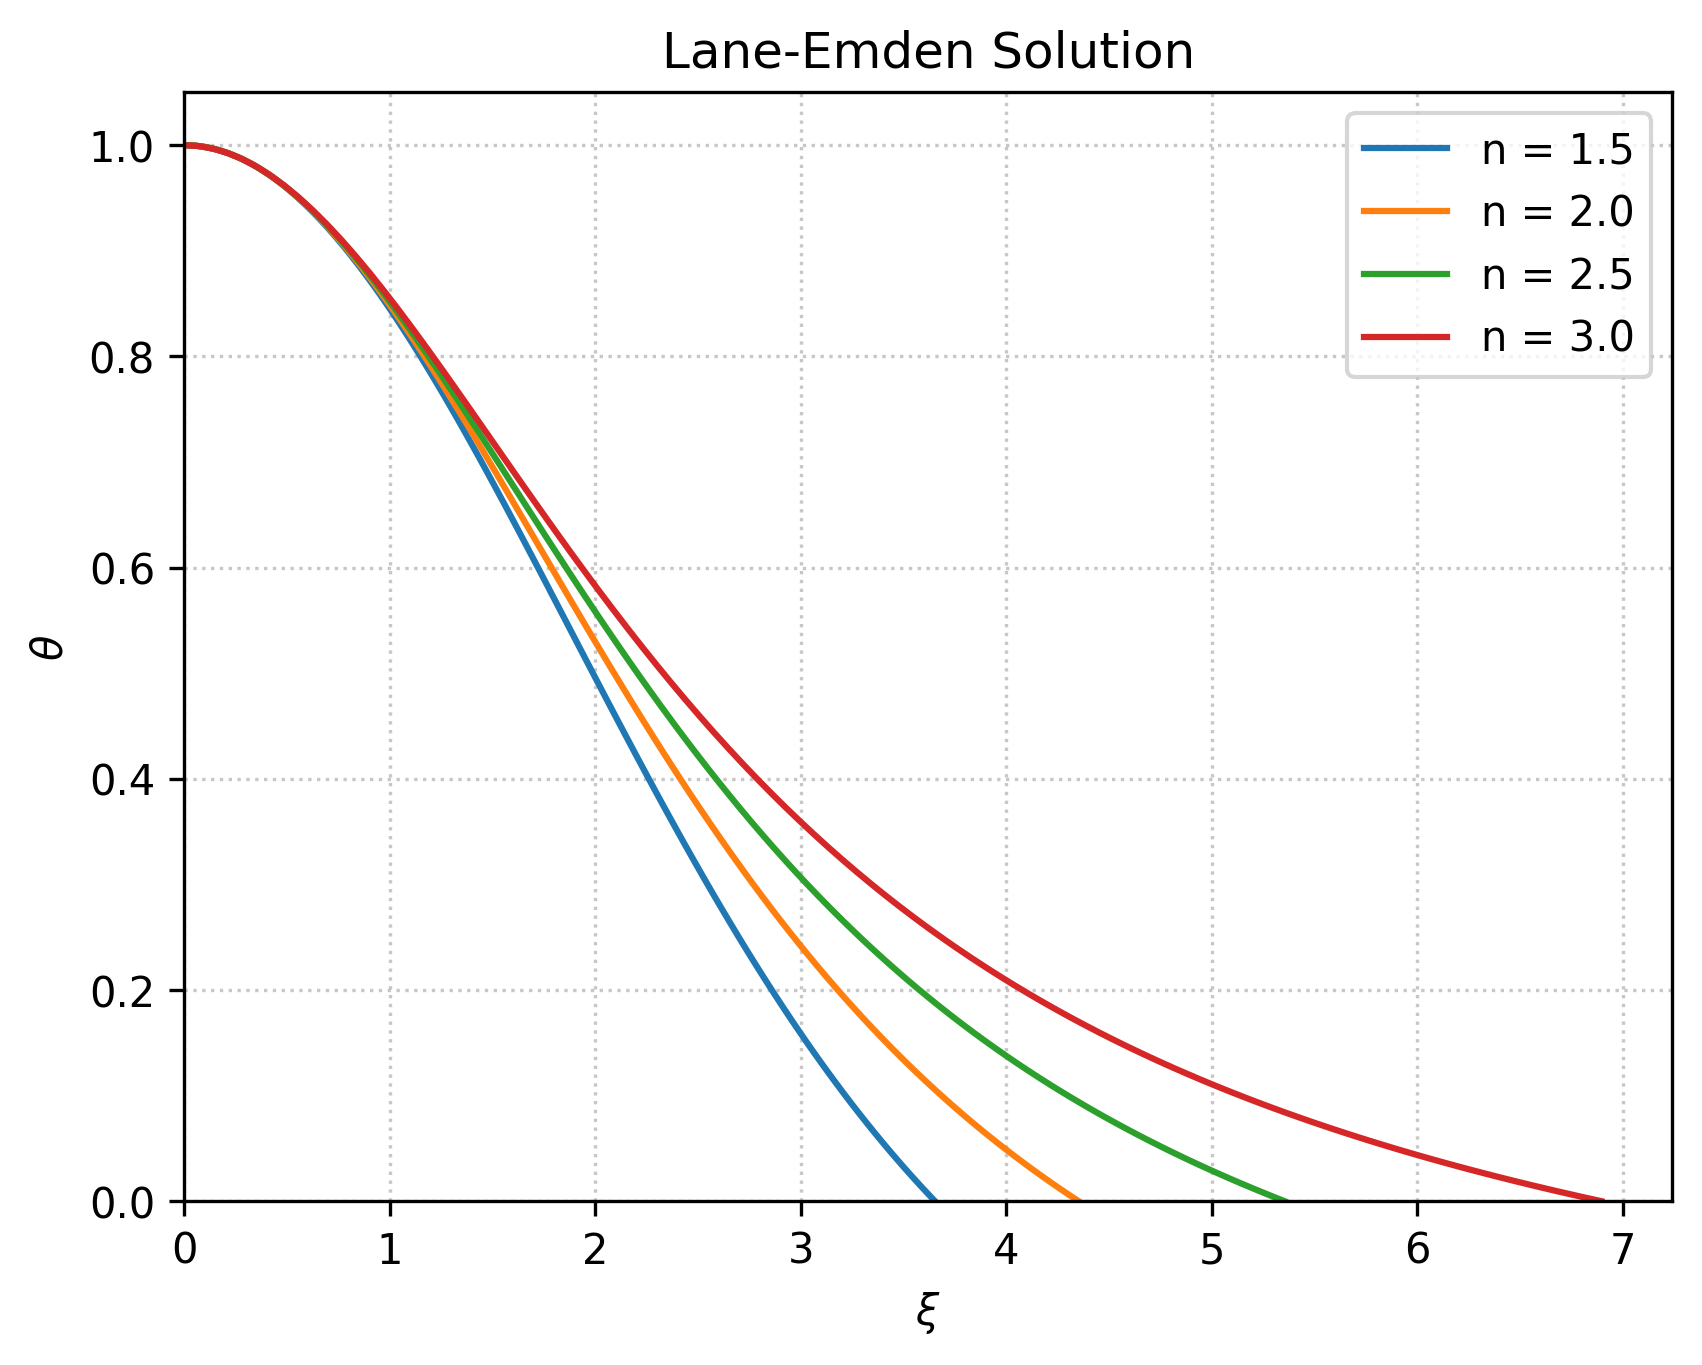

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

class Polytrope:
    """
    Represents and solves the Lane-Emden equation for a given polytropic index n.
    """
    def __init__(self, n):
        """
        Initializes the Polytrope object and solves the Lane-Emden equation.

        Args:
            n (float): The polytropic index (n>=0 & n<5).
        """
        self.n = float(n)
        self.sol = None
        self.xi_1 = np.nan
        self.D_n = np.nan
        self.M_n = np.nan
        self.R_n = np.nan
        self.valid = False

        # --- ODE System Definition  ---
        # y[0] = theta, y[1] = dtheta/dxi
        def lane_emden_ode(xi, y):
            theta, dtheta_dxi = y
            # Avoid issues with theta<=0 if solver oversteps slightly near root
            theta_clipped = np.maximum(theta, 0)

            if self.n == 0:
                theta_n = 1.0
            else:
                try:
                    theta_n = np.power(theta_clipped, self.n)
                except ValueError: # Should not happen if theta_clipped >= 0
                    theta_n = 0.0 

            # Calculate d^2(theta)/dxi^2, avoid division by zero at xi=0
            xi_safe = xi if xi > 1e-15 else 1e-15
            d2theta_dxi2 = -2.0 / xi_safe * dtheta_dxi - theta_n
            return [dtheta_dxi, d2theta_dxi2]

        # --- Event Function: Find first zero of theta 
        def find_theta_zero(xi, y):
            return y[0] # Event triggers when theta = y[0] = 0
        find_theta_zero.terminal = True   # Stop integration at the event
        find_theta_zero.direction = -1   

        # --- Initial Conditions (near xi=0 using Taylor expansion) ---
        xi_start = 1e-10 # Start slightly away from the singularity at xi=0
        theta_start = 1.0 - xi_start**2 / 6.0
        dtheta_dxi_start = -xi_start / 3.0
        y0 = [theta_start, dtheta_dxi_start]

        # --- Integration ---
        xi_max = 100.0 
        t_span = [xi_start, xi_max]
        solver_opts = {
            'method': 'RK45', 
            'events': find_theta_zero,
            'dense_output': True,
            'rtol': 1e-8,
            'atol': 1e-10
        }
        self.sol = solve_ivp(fun=lane_emden_ode, t_span=t_span, y0=y0, **solver_opts) 


        self.xi_1 = self.sol.t_events[0][0]
        # Evaluate solution derivative at xi_1 using dense output
        y_at_xi1 = self.sol.sol(self.xi_1)
        theta_prime_at_xi1 = y_at_xi1[1]

        # Calculate constants (handle potential division by zero in D_n)
        self.M_n = -self.xi_1**2 * theta_prime_at_xi1
        if abs(theta_prime_at_xi1) > 1e-15: # Avoid division by zero
            self.D_n = self.xi_1 / (3.0 * abs(theta_prime_at_xi1))
        else:
            # This case (zero derivative at zero theta) shouldn't happen for n<5
            self.D_n = np.inf # Derivative is zero, mean density is zero relative to central


    def define_constants(self):
        """
        Returns (xi_1, D_n, M_n)
        Returns (nan, nan, nan, nan) if the calculation was invalid (n>=5 or integration error).
        """
        return self.xi_1, self.D_n, self.M_n

    def get_xi(self, num_points=100):
        """
        Args:
            num_points (int): Number of points to generate.

        Returns:
            np.ndarray or None: Array of xi values, or None if the solution is invalid.
        """
        return np.linspace(0, self.xi_1 + 1e-9, num_points)


    def get_theta(self, xi_values=None, num_points=100):
        """
        Args:
            xi_values (np.ndarray, optional): Specific xi values at which to evaluate theta.
                                             If None, generates num_points linearly spaced
                                             between 0 and xi_1.
            num_points (int): Number of points to generate if xi_values is None.

        Returns:
            np.ndarray or None: Array of theta values, or None if the solution is invalid.
        """

        if xi_values is None:
            xi_values = self.get_xi(num_points)
            if xi_values is None: # Handle case where get_xi failed
                return None

        theta_values = self.sol.sol(xi_values)[0]
        return np.maximum(theta_values, 0)

# Calculate polytropes between n=1.5 and n=3.0
# and print the constants xi_1, D_n, M_n for n=1.5, 2.0, 2.5, 3.0
n_values = np.linspace(1.5,3.0,1501)
polytropes = {}
print("|  n    |   xi_1   |   D_n    |   M_n    |")
for n in n_values:
    n = np.round(n,3)
    polytropes[n] = Polytrope(n)
    xi_1, D_n, M_n, = polytropes[n].define_constants()
    if n==1.5 or n==2.0 or n==2.5 or n==3.0: print(f"| {n:.3f} | {xi_1:8.4f} | {D_n:8.4f} | {M_n:8.4f} |")

# Plot the results for n=1.5, 2.0, 2.5, and 3.0
plt.figure()
plt.plot(polytropes[1.5].get_xi(), polytropes[1.5].get_theta(), label=f'n = {1.5}')
plt.plot(polytropes[2.0].get_xi(), polytropes[2.0].get_theta(), label=f'n = {2.0}')
plt.plot(polytropes[2.5].get_xi(), polytropes[2.5].get_theta(), label=f'n = {2.5}')
plt.plot(polytropes[3.0].get_xi(), polytropes[3.0].get_theta(), label=f'n = {3.0}')
plt.xlabel("$\\xi$")
plt.ylabel("$\\theta$")
plt.title(f"Lane-Emden Solution")
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend();

Looking at the change of $D_n$, we see that an n=3 polytrope is significantly more centrally condensed than an n=1.5 polytrope, as expected.

### Calculating Stellar Profile

Using the polytrope constants and dimension less coordinates $\theta$ and $\xi$, we can calculate all properties we need of the star. 

- **Density and Pressure**

By definition of the Lane-Emden function $\theta(\xi)$, the density profile within the star is given by:

$$\rho(r) = \rho_c [\theta(\xi)]^n$$

where $\rho_c$ is the central density and $\xi$ is the dimensionless radial coordinate corresponding to the physical radius $r$.

The pressure profile immediately follows from substituting the density profile into the polytropic equation of state:

$$P(r) = K [\rho_c \theta^n(\xi)]^{1 + 1/n} = K \rho_c^{1+1/n} [\theta(\xi)]^{n(1+1/n)} = K \rho_c^{1+1/n} [\theta(\xi)]^{n+1}$$
Recognizing that the central pressure $P_c = K \rho_c^{1+1/n}$, we can also write:
$$P(r) = P_c [\theta(\xi)]^{n+1}$$

- **Temperature**

Assuming the stellar material behaves as an ideal gas, $P = \frac{\rho k_B T}{\mu m_H}$. We can solve for the temperature $T$:

$$T(r) = \frac{P(r) \mu m_H}{\rho(r) k_B}$$

Substituting the expressions for $P(r)$ and $\rho(r)$ in terms of $\theta(\xi)$:
$$T(r) = \frac{P_c [\theta(\xi)]^{n+1}}{\rho_c [\theta(\xi)]^n} \frac{\mu m_H}{k_B} = \frac{P_c}{\rho_c} \theta(\xi) \frac{\mu m_H}{k_B}$$
Since the central temperature $T_c = \frac{P_c \mu m_H}{\rho_c k_B}$, the temperature profile becomes:
$$T(r) = T_c \theta(\xi)$$

- **Central Density**

At the center of the star ($r=0, \xi=0$), the density is $\rho_c$ and the temperature is $T_c$. The pressure $P_c$ can be expressed using both the polytropic equation of state and the ideal gas law:
$$P_c = K \rho_c^{1+1/n}$$
$$P_c = \frac{\rho_c k_B T_c}{\mu m_H}$$

Equating these two expressions for $P_c$:
$$K \rho_c^{1+1/n} = \frac{\rho_c k_B T_c}{\mu m_H}$$
Assuming $\rho_c \neq 0$, we can divide by $\rho_c$:
$$K \rho_c^{1/n} = \frac{k_B T_c}{\mu m_H}$$
Solving for $\rho_c^{1/n}$:
$$\rho_c^{1/n} = \frac{k_B T_c}{K \mu m_H}$$
Raising both sides to the power of $n$ gives the central density:

$$\rho_c = \left(\frac{k_B T_c}{K \mu m_H}\right)^n$$

- **Stellar Radius**

The physical radius $r$ is related to the dimensionless radius $\xi$ by $r = \alpha \xi$. The characteristic length scale $\alpha$ is defined as:
$$\alpha = \sqrt{\frac{(n+1)K}{4\pi G \rho_c^{1-1/n}}}$$
The stellar surface is reached when $r = R_{star}$ and $\xi = \xi_1$. Therefore, the stellar radius $R_{star}$ is:
$$R_{star} = \alpha \xi_1$$
Substituting the expression for $\alpha$:

$$R_{star} = \left[\frac{(n+1)K}{4\pi G \rho_c^{1-1/n}}\right]^{1/2} \xi_1$$

This equation connects the total radius of the star to the polytropic constant $K$, central density $\rho_c$, polytropic index $n$, and the first zero of the Lane-Emden function $\xi_1$.

- **Radial Coordinate Transformation**

From the relations $r = \alpha \xi$ and $R_{star} = \alpha \xi_1$, we can express the scaling factor $\alpha = R_{star}/\xi_1$. Substituting this into the first relation gives the physical radius $r$ at a given $\xi$ in terms of the total radius $R_{star}$:

$$r = \left(\frac{R_{star}}{\xi_1}\right) \xi$$
This can also be written as $r/R_{star} = \xi/\xi_1$, showing the direct proportionality between the fractional radius and the fractional dimensionless coordinate.

- **Dimensionless Mass Fraction**

The mass $dm$ in a spherical shell of radius $r$ and thickness $dr$ is $dm = 4\pi r^2 \rho dr$.
Using the transformations $r = \alpha\xi$ (so $dr = \alpha d\xi$) and $\rho = \rho_c \theta^n$:
$$dm = 4\pi (\alpha\xi)^2 (\rho_c \theta^n) (\alpha d\xi) = 4\pi \alpha^3 \rho_c \xi^2 \theta^n d\xi$$
The Lane-Emden equation, which describes $\theta(\xi)$, is given by $\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2 \frac{d\theta}{d\xi}\right) = -\theta^n$.
Thus, we can substitute $\xi^2 \theta^n = -\frac{d}{d\xi}\left(\xi^2 \frac{d\theta}{d\xi}\right)$:
$$dm = -4\pi \alpha^3 \rho_c \left(\frac{d}{d\xi'}\left(\xi'^2 \frac{d\theta}{d\xi'}\right)\right) d\xi'$$
Integrating from the center ($\xi'=0$) to a dimensionless radius $\xi$ gives the mass $m(\xi)$ enclosed within that radius. Given that $\xi^2 \frac{d\theta}{d\xi} = 0$ at $\xi=0$:$$m(\xi) = -4\pi \alpha^3 \rho_c \xi^2 \frac{d\theta}{d\xi}$$The total mass of the star, $M_{star}$, is $m(\xi_1)$:
$$M_{star} = -4\pi \alpha^3 \rho_c \xi_1^2 \left(\frac{d\theta}{d\xi}\right)_{\xi_1}$$
Using the definition $M_n = -\xi_1^2 \left(\frac{d\theta}{d\xi}\right)_{\xi_1}$, we have:
$$M_{star} = 4\pi \alpha^3 \rho_c M_n$$
The dimensionless mass fraction $q(\xi) = m(\xi)/M_{star}$ is then:

$$q(\xi) = \frac{-4\pi \alpha^3 \rho_c \xi^2 \frac{d\theta}{d\xi}}{4\pi \alpha^3 \rho_c M_n} = \frac{-\xi^2 \frac{d\theta}{d\xi}}{M_n}$$

- **The Polytropic Constant $K$**

The polytropic constant $K$ can be related to the global properties of the star, such as its total mass $M_{star}$ and central temperature $T_c$.
From the expression $M_{star} = 4\pi \alpha^3 \rho_c M_n$, we substitute $\alpha^2 = \frac{(n+1)K}{4\pi G \rho_c^{1-1/n}}$ and $\rho_c = \left(\frac{k_B T_c}{\mu m_H K}\right)^n = \left(\frac{A}{K}\right)^n$, where $A = \frac{k_B T_c}{\mu m_H}$.

$$M_{star} = 4\pi \left[\frac{(n+1)K}{4\pi G \rho_c^{(n-1)/n}}\right]^{3/2} \rho_c M_n = (4\pi)^{-1/2} G^{-3/2} [(n+1)K]^{3/2} \rho_c^{-(3/2)(n-1)/n + 1} M_n$$
$$M_{star} = (4\pi)^{-1/2} G^{-3/2} (n+1)^{3/2} K^{3/2} \rho_c^{(2n - 3n + 3)/(2n)} M_n = (4\pi)^{-1/2} G^{-3/2} (n+1)^{3/2} K^{3/2} \rho_c^{(3-n)/(2n)} M_n$$
Now, substitute $\rho_c = (A/K)^n$:
$$M_{star} = (4\pi)^{-1/2} G^{-3/2} (n+1)^{3/2} K^{3/2} \left[\left(\frac{A}{K}\right)^n\right]^{(3-n)/(2n)} M_n$$
$$M_{star} = (4\pi)^{-1/2} G^{-3/2} (n+1)^{3/2} M_n A^{(3-n)/2} K^{(3 - (3-n))/2}$$
This simplifies to:
$$M_{star} = (4\pi)^{-1/2} G^{-3/2} (n+1)^{3/2} M_n \left(\frac{k_B T_c}{\mu m_H}\right)^{(3-n)/2} K^{n/2}$$
Solving this equation for $K$ yields:
$$K = \left[ \frac{(4\pi)^{1/2} M_{star} G^{3/2}}{(n+1)^{3/2} M_n \left(\frac{k_B T_c}{\mu m_H}\right)^{(3-n)/2}} \right]^{2/n}$$

We have $M_{star}=0.3M_\odot$, with $\mu=0.617$ (solar composition, i.e., $X=0.7$, $Y=0.28$), and we have $M_n$ from last section. Assuming core ignition temperature $T=1.1\times10^7$ K and polytrope constant with index n=1.5 (describes a fully convective star), we can calculate $K$. Once we have $K$, we can easily calculate the rest properties of the star, using the derived relations.



R_star = 0.209 solar radius


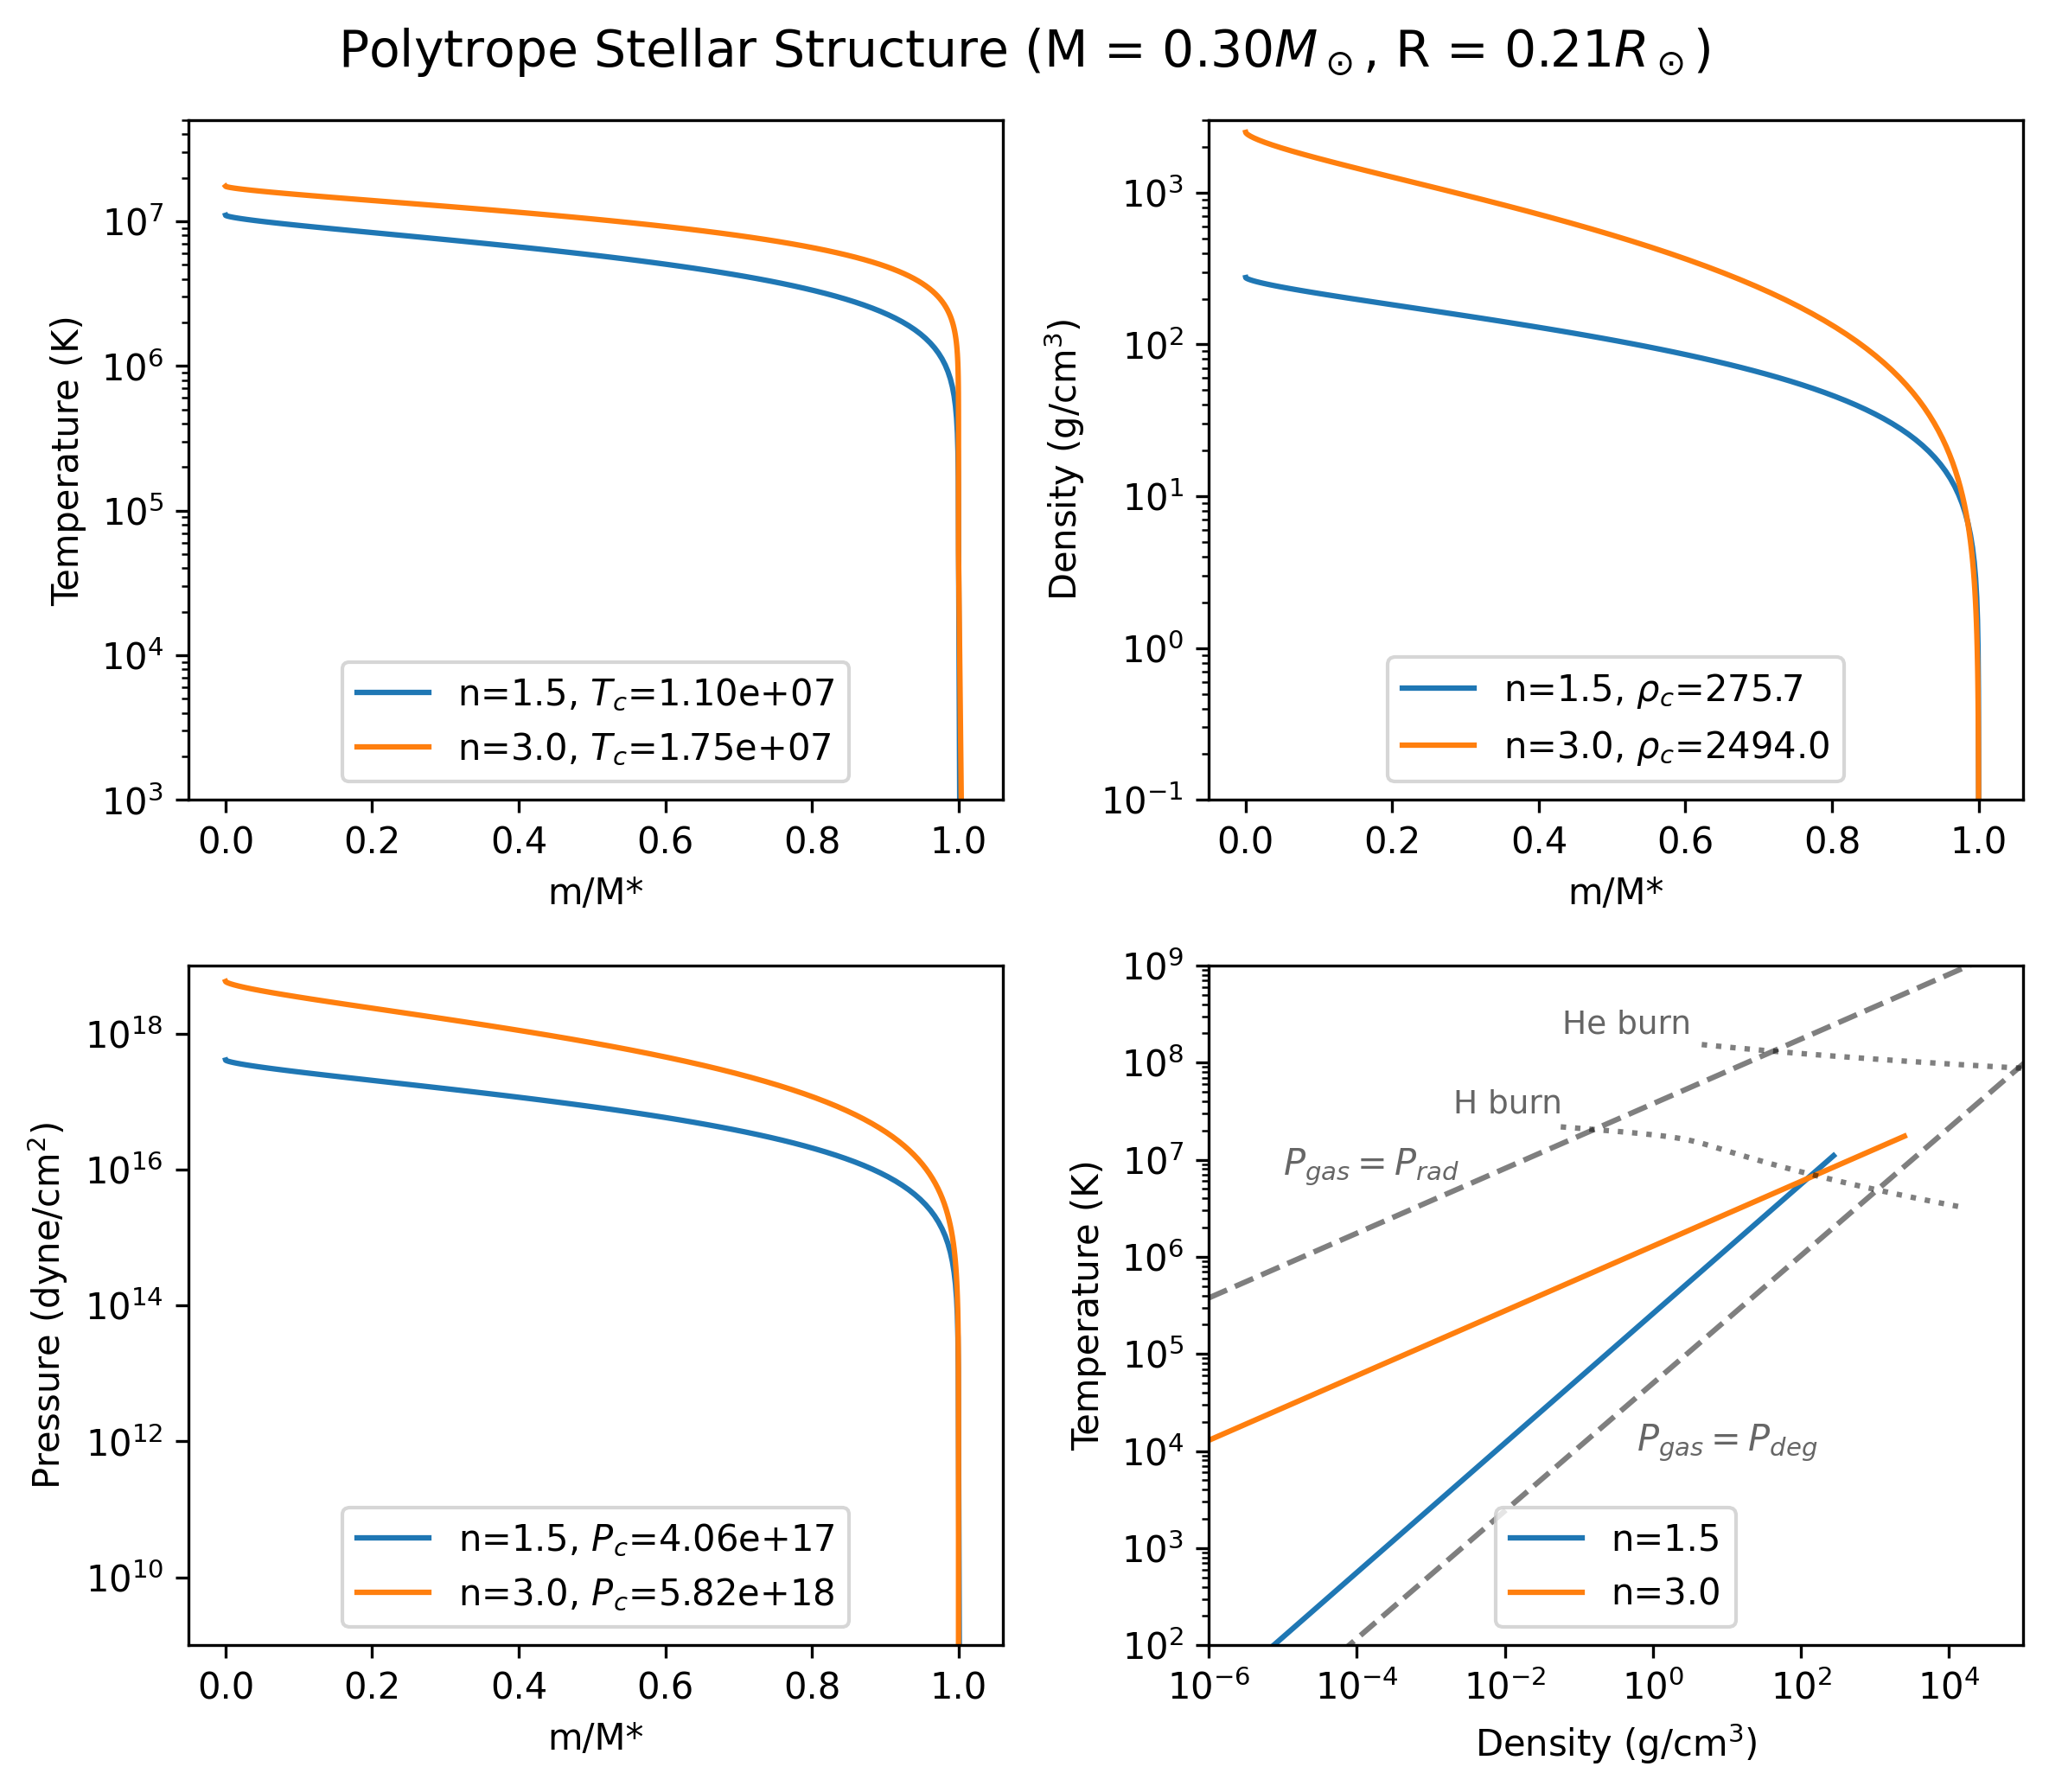

In [2]:
# Physical constants in CGS units
G = 6.67430e-8
k_B = 1.380649e-16
m_H = 1.6735575e-24
m_sun = 1.989e33
r_sun = 6.9599e10
L_sun = 3.828e33

# Calculate R_star for given H ignition temperature Tc=1e7, assuming n=1.5 at initial
Tc = 1.1e7
M_star = 0.3*m_sun
mu = 0.6166495375

n = 1.5
theta = polytropes[n].get_theta()
xi = polytropes[n].get_xi()
M_n = polytropes[n].M_n
xi_1 = polytropes[n].xi_1
K = (((4*np.pi)**0.5 * M_star) / ( ((n+1)/G)**1.5 * (k_B * Tc / (mu * m_H))**((3*(3-n))/(4*n)) * M_n ))**( (4*n) / (9*(n-1)) )
rhoc = (k_B * Tc / (mu * m_H * K))**n
R_star = (((n + 1) * K) / (4 * np.pi * G * rhoc**(1 - 1/n)))**0.5 * xi_1
print(f"R_star = {R_star/r_sun:.3f} solar radius")

# --- create plots to compare with n=3.0 at same radii---
fig, axes = plt.subplots(2, 2, figsize=(8, 7))
fig.suptitle(f'Polytrope Stellar Structure (M = {M_star/m_sun:.2f}$M_\\odot$, R = {R_star/r_sun:.2f}$R_\\odot$)', fontsize=14)

for n in [1.5, 3.0]:
    theta = polytropes[n].get_theta()
    xi = polytropes[n].get_xi()
    M_n = polytropes[n].M_n
    xi_1 = polytropes[n].xi_1
    D_n = polytropes[n].D_n

    rhoc = D_n * M_star / (4*np.pi*R_star**3/3)
    K = (4 * np.pi * G * R_star**2 * rhoc**((n - 1) / n)) / ((n + 1) * xi_1**2)
    rho = (rhoc * theta**n) + 1e-18 #avoid zero
    P = K * rho**(1+1/n)
    T = P * mu *m_H / rho / k_B
    r = 1/xi_1*xi

    dtheta_dxi = np.gradient(theta, xi)
    q = -xi**2*dtheta_dxi/M_n

    # 1. Temperature vs. q
    ax1 = axes[0, 0]
    ax1.plot(q, T,label=f'n={n}, $T_c$={T[0]:.2e}')
    ax1.legend(loc='lower center')
    ax1.set_xlabel('m/M*')
    ax1.set_ylabel('Temperature (K)')
    ax1.set_ylim  (1.e3, 5.e7)
    ax1.set_yscale('log')

    # 2. Density vs. q
    ax2 = axes[0, 1]
    ax2.plot(q, rho, label=f'n={n}, $\\rho_c$={rhoc:.1f}')
    ax2.legend(loc='lower center')
    ax2.set_xlabel('m/M*')
    ax2.set_ylabel('Density (g/cm$^3$)')
    ax2.set_yscale('log')
    ax2.set_ylim(1e-1, 3e3)

    # 3. Pressure vs. q
    ax3 = axes[1, 0]
    ax3.plot(q, P, label=f'n={n}, $P_c$={P[0]:.2e}')
    ax3.legend(loc = 'lower center')
    ax3.set_xlabel('m/M*')
    ax3.set_ylabel('Pressure (dyne/cm$^2$)')
    ax3.set_yscale('log')
    ax3.set_ylim (1e9, 1e19)

    # 4. Temperature vs. Density (T-rho diagram)
    ax4 = axes[1, 1]
    ax4.plot(rho, T, label=f'n={n}')
    ax4.legend(loc='lower center')
    ax4.set_xlabel('Density (g/cm$^3$)')
    ax4.set_ylabel('Temperature (K)')
    ax4.set_xscale('log')
    ax4.set_yscale('log')


# Add reference lines. Equations from AST 341 HW 6
# rho for plotting
rhop = np.linspace(1e-6, 1e9, 200)

# Temperature where radiation pressure equals ideal gas pressure
T_rad = 32065308.02 * rhop**(1/3) / mu**(1/3)

# Density where NR degeneracy pressure equals relativistic degeneracy pressure
mu_e = 2/(1+0.7) # Assuming 70% H
rho_R = 1906624* mu_e

# Temperature where degeneracy pressure equals ideal gas pressure
T_deg = (120272.35* mu *rhop**(2/3) / mu_e**(5/3))*(rhop<rho_R) + (14913772* mu *rhop**(1/3) / mu_e**(4/3))*(rhop>=rho_R)

# Hydrogen ignition temperature and density
# ignition is defined as epsilon > 1 ergs/g/s
T9 = np.linspace(0.0033,0.022,200)
rho_H_ignition = (625.0 * T9**(2/3) * np.exp(15.228 / T9**(1/3))) / (7.5615e6 * np.exp(11.848 / T9**(1/3)) + 3.905e26)

# Helium ignition temperature and density
T8 = np.linspace(0.72,1.55,200)
rho_He_ignition = 1.4017e-6 * (T8**(3/2)) * (np.exp(22.014/T8))

# Plot reference lines
ax4.plot(rhop, T_rad, 'k--',alpha=0.5)
ax4.plot(rhop, T_deg, 'k--',alpha=0.5)
ax4.plot(rho_H_ignition, T9*1e9 , 'k:',alpha=0.5)
ax4.plot(rho_He_ignition, T8*1e8, 'k:',alpha=0.5)

# Add labels for reference lines
ax4.text(0.6, 1e4, '$P_{gas}=P_{deg}$', fontsize=10, color='k',alpha=0.6)
ax4.text(1e-5, 7e6, '$P_{gas}=P_{rad}$', fontsize=10, color='k',alpha=0.6)
ax4.text(2e-3, 3e7, 'H burn', fontsize=9, color='k',alpha=0.6)
ax4.text(6e-2, 2e8, 'He burn', fontsize=9, color='k',alpha=0.6)

ax4.set_xlim(1e-6, 1e5)
ax4.set_ylim(1e2, 1e9)
plt.tight_layout()
plt.show()

## 3. Reaction Networks

In the last chapter, we have dealed with the first two equations of stellar structure, the HSE and mass continuity equation. For the third equation of radiation energy transfer, since red dwarfs transfering energy almost fully convectively, we can simply ignore this equation because  our polytrope model already mix the star by ideal gas law. So there's only one equation left: the energy generation equation:

$$\frac{dL}{dr} = 4\pi r^2 \rho \epsilon$$

We can integrate from the center of the star ($r=0$) to its surface ($r=R$):
$$\int_0^R \frac{dL(r)}{dr} dr = \int_0^R 4\pi r^2 \rho \epsilon dr$$
The left-hand side evaluates to:
$$L(R) - L(0)$$
Here, $L(R)$ is the luminosity at the star's surface, which is the total energy radiated by the star per unit time, denoted as $L_{surf}$. The luminosity at the center, $L(0)$, is zero, as there is no energy flowing out of a point of zero volume (assuming no central point source). Terefore the equation becomes:
$$L_{surf} = \int_0^R 4\pi r^2 \rho \epsilon dr$$

Here $L_{surf}$, $\rho$ and $R$ are all provided by the polytrope model. The only in the equation we don't know is the energy generate rate $\epsilon$, which is require us to model the reaction network. We will use ``pynucastro`` to model the reaction networks, from which we can solve for the energy generation rate $\epsilon$.

We first install the ``pynucastro`` package:

In [3]:
%pip install pynucastro -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


For a $0.3M_{\odot}$ star, the core temperature is not hight enough for Helium burning, so we only focus on the hyrogen burning reactions:
- proton-proton chain: pp1, pp2, pp3 ([hep reaction](https://en.wikipedia.org/wiki/Proton%E2%80%93proton_chain#The_p%E2%80%93p_IV_(Hep)_branch) is also possible, but it's too rare to happen.)

- CNO cycle: cno1, cno2 ([cno3](https://en.wikipedia.org/wiki/CNO_cycle#CNO-III) and [cno4](https://en.wikipedia.org/wiki/CNO_cycle#CNO-IV) are only significant in massive stars)

We first look at these reaction networks induvidually, using the core condision we got in last section:

rate be8(,he4)he4 not found


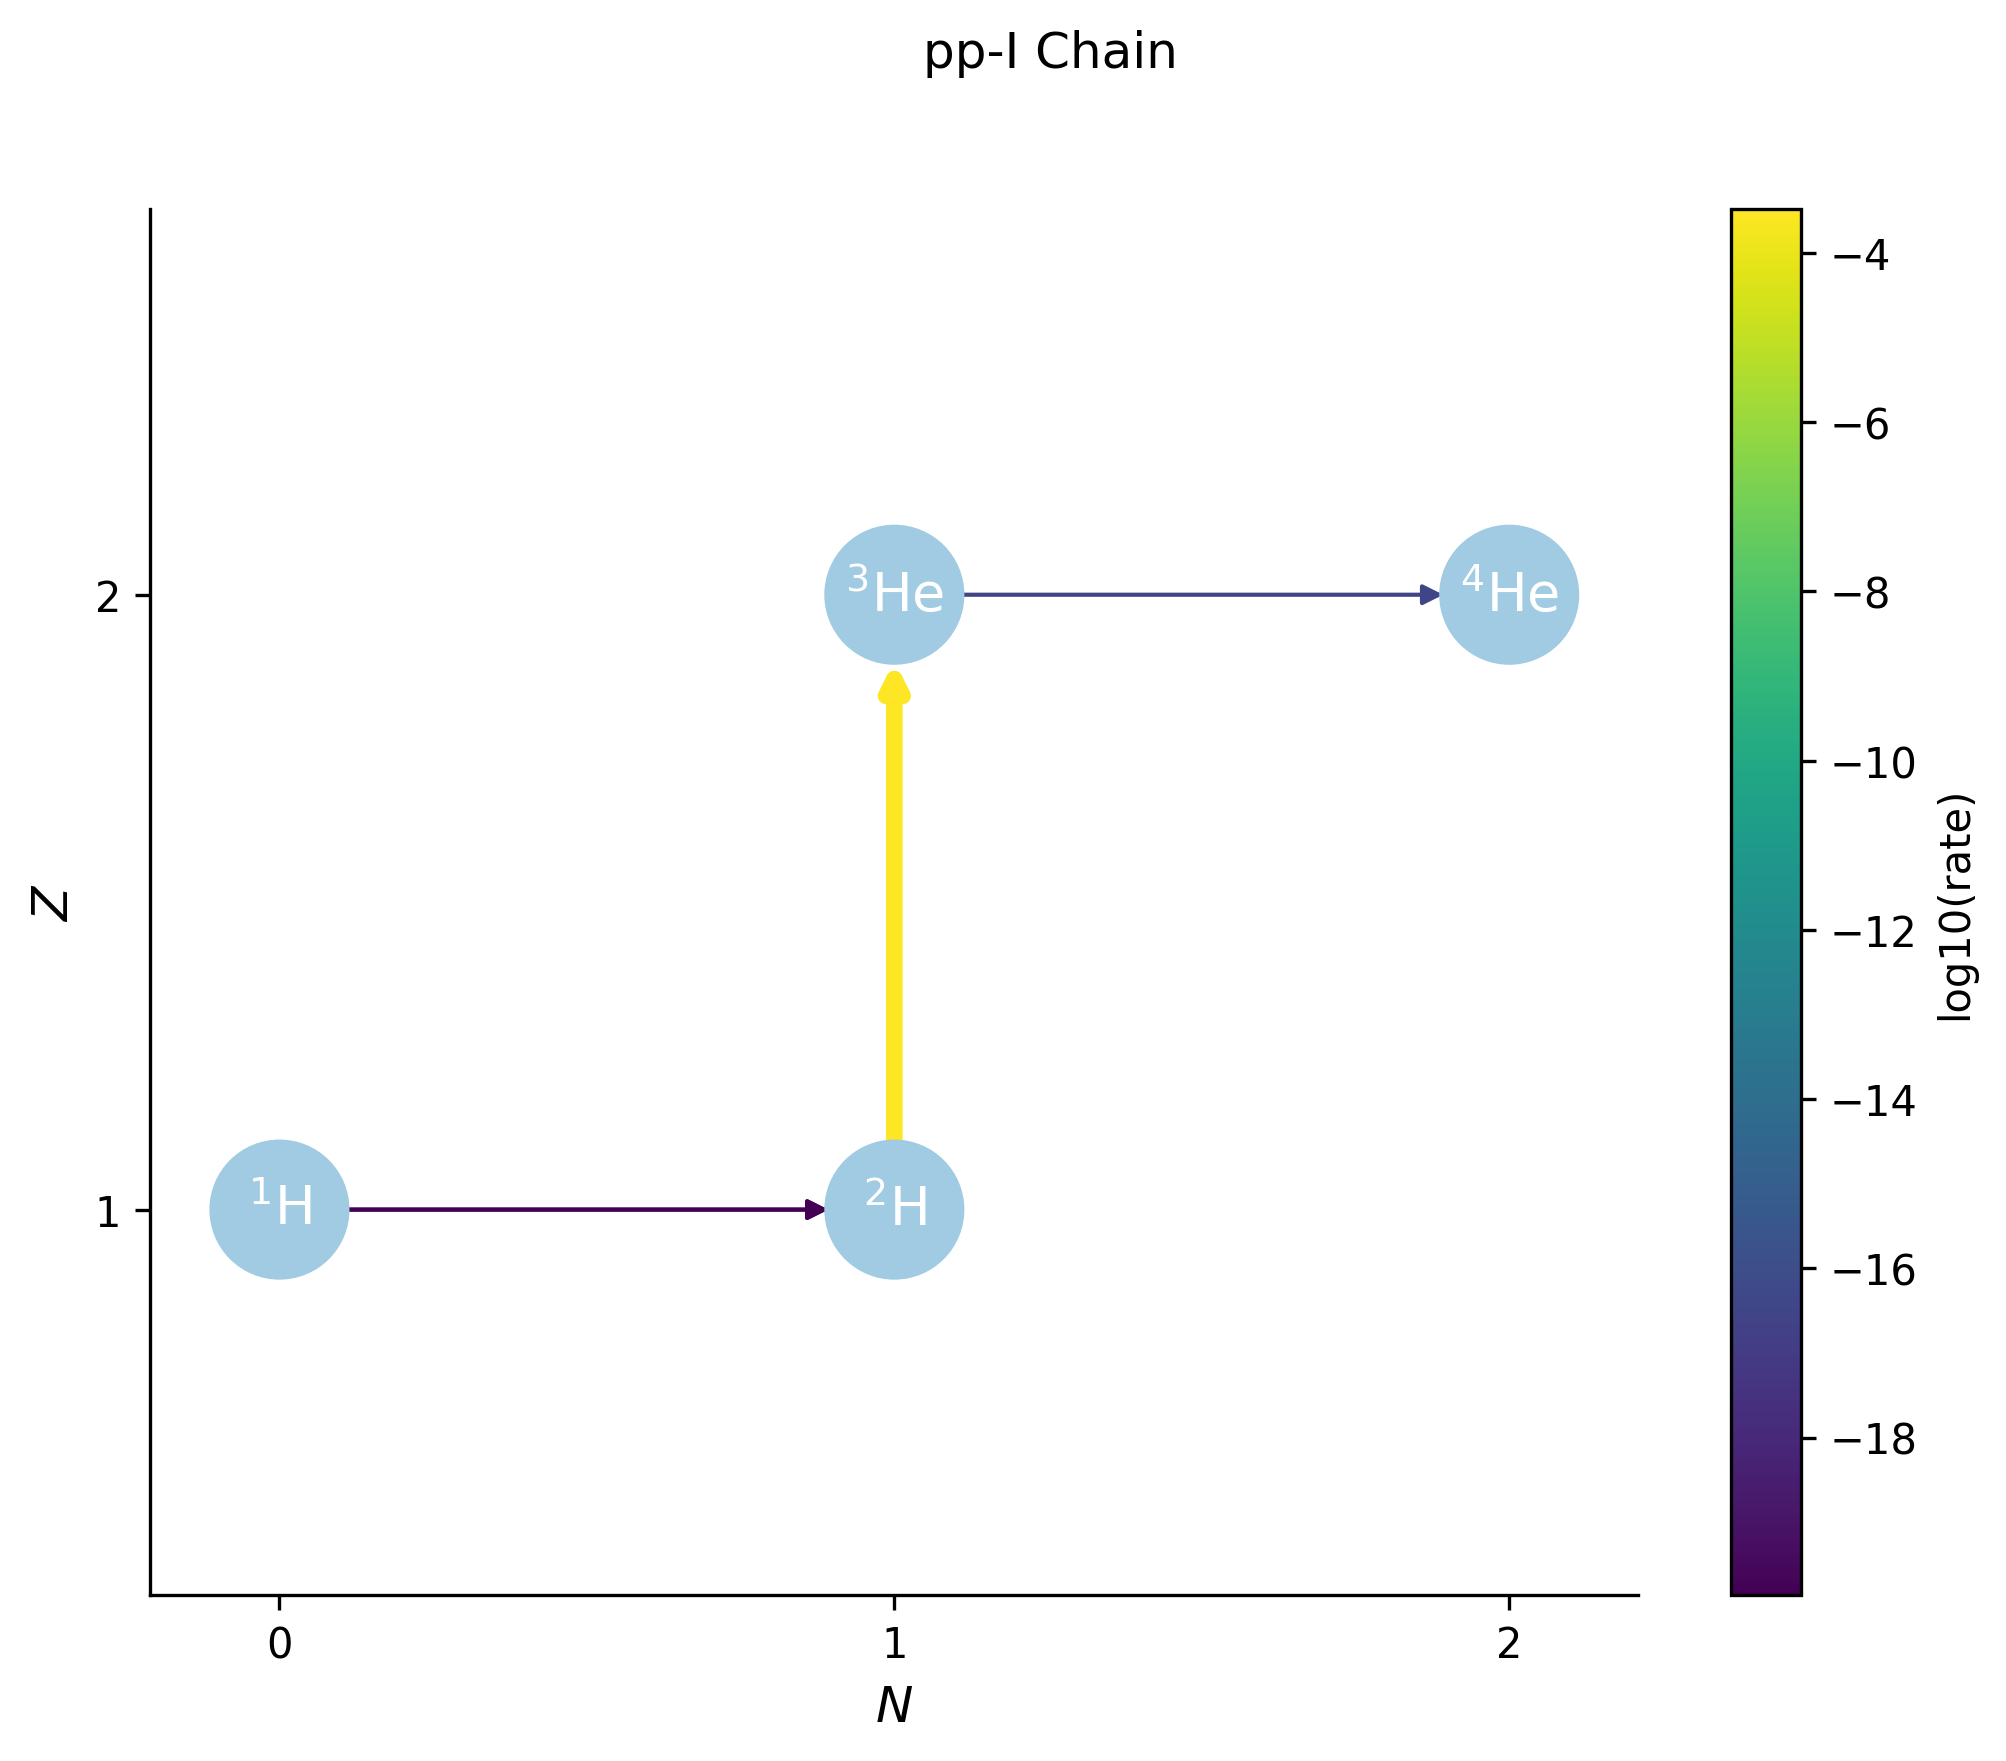

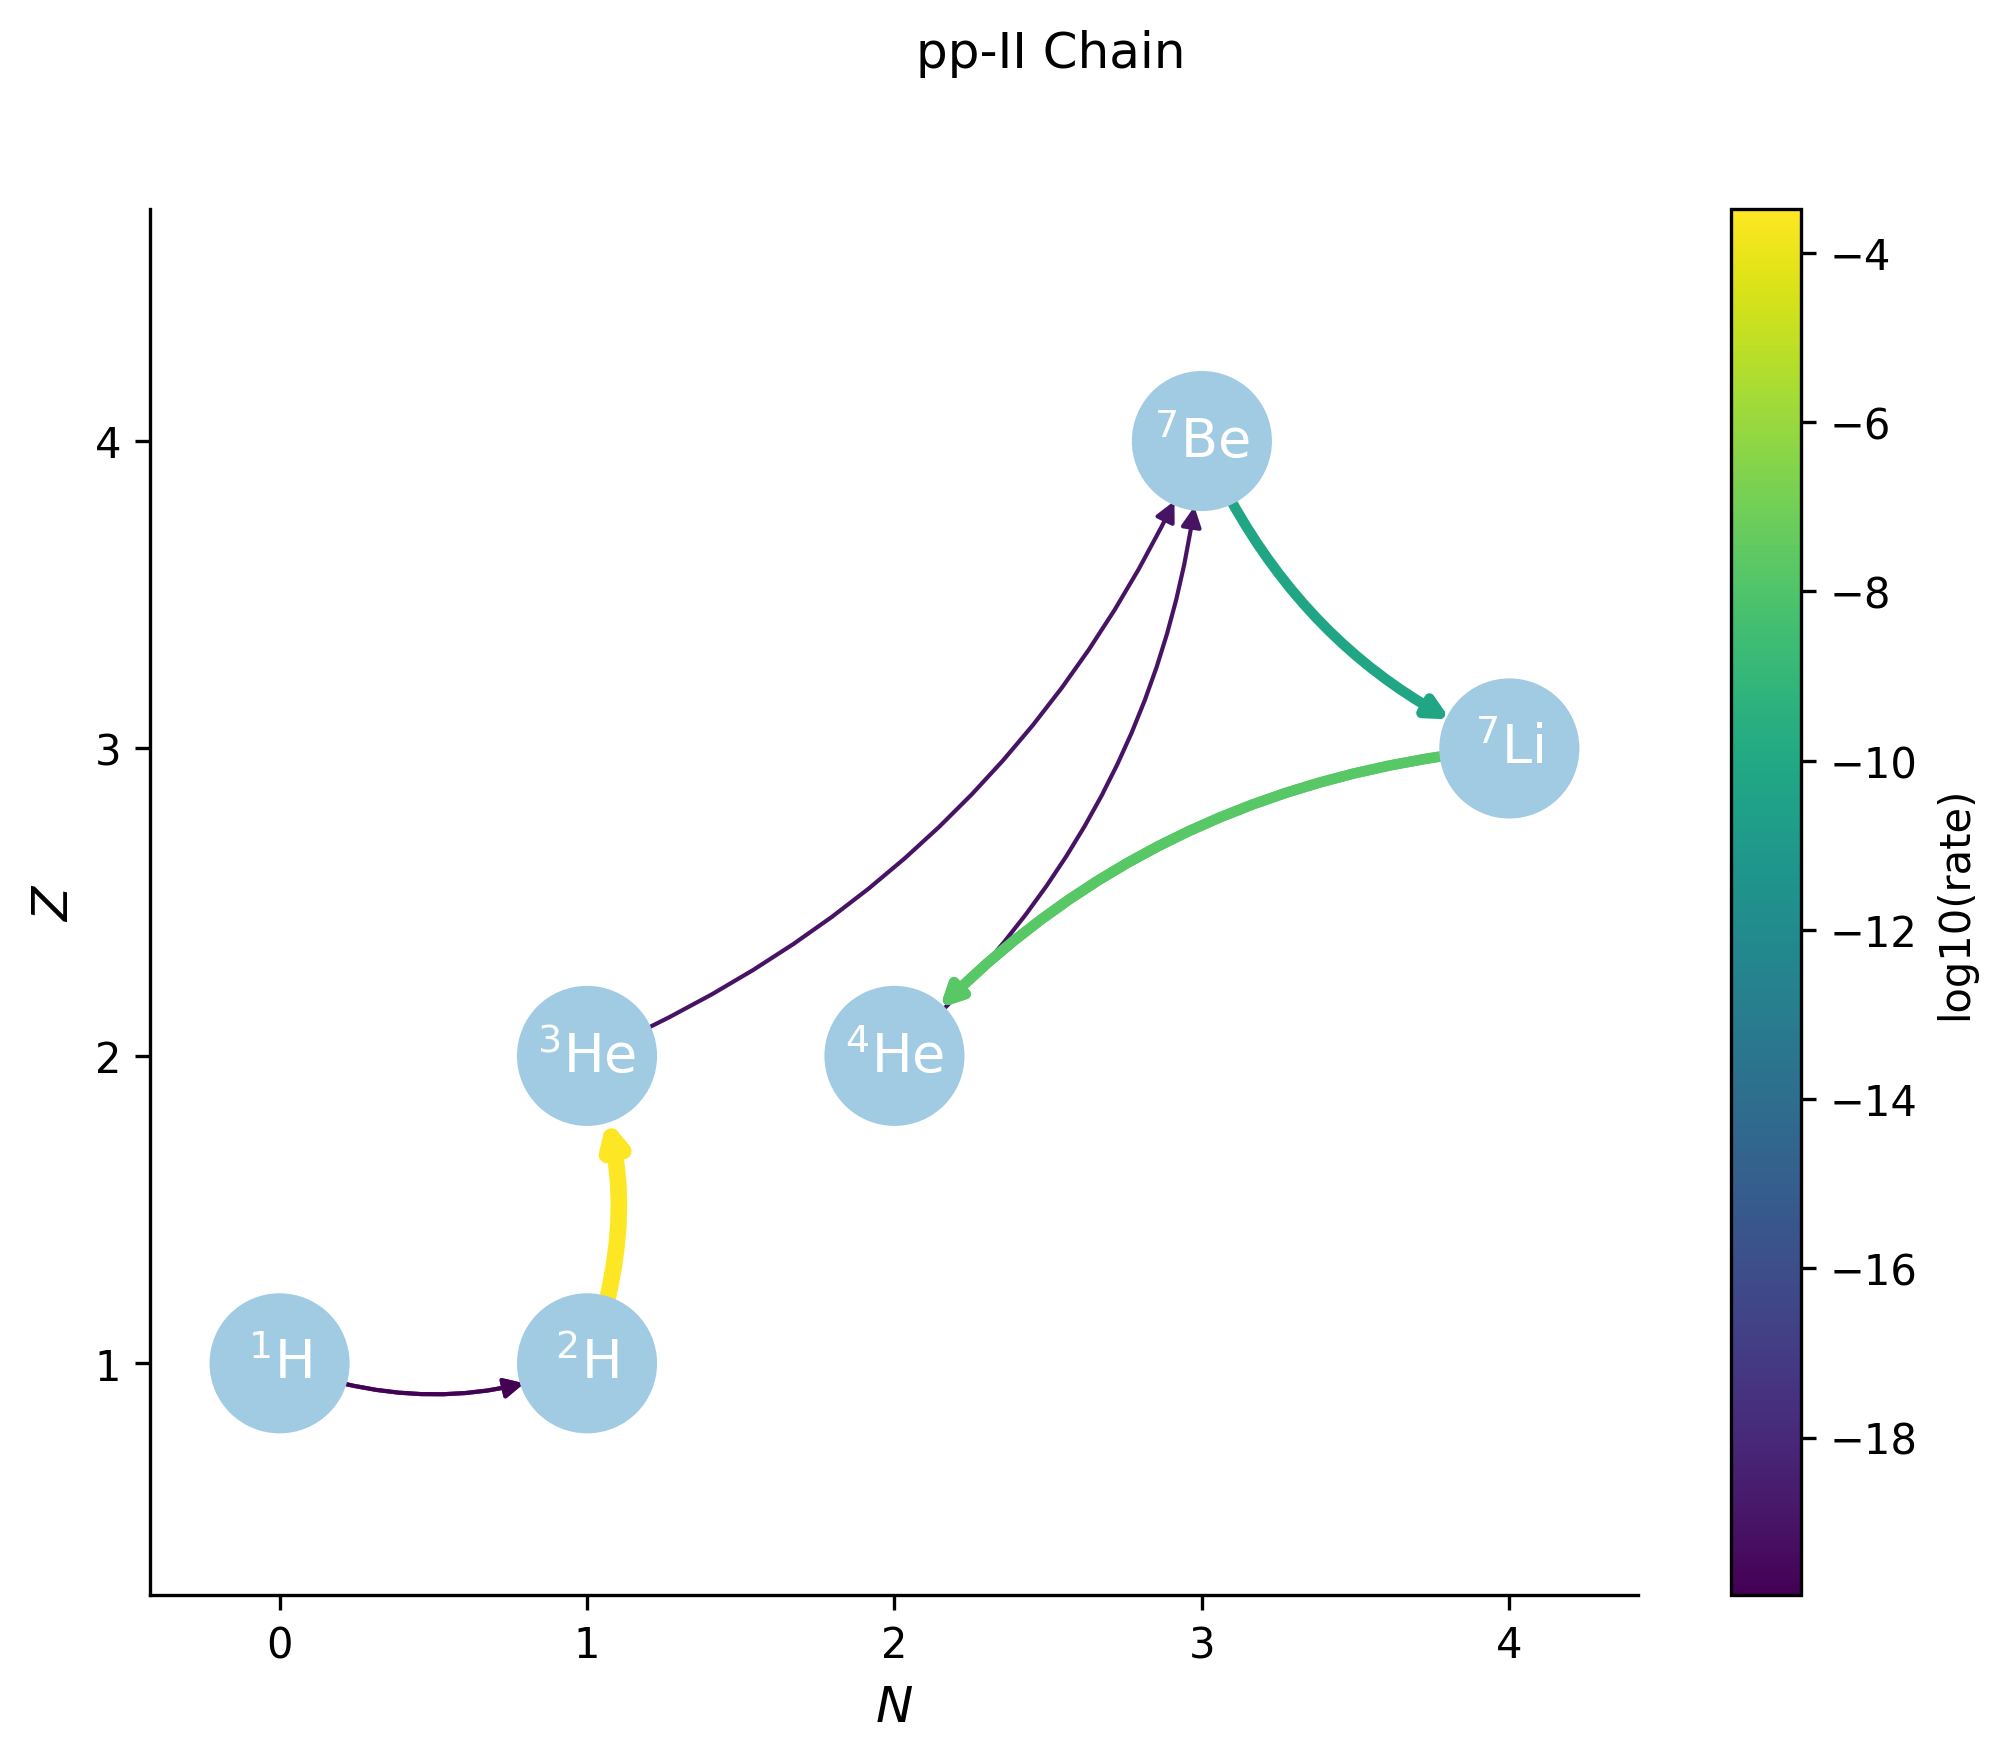

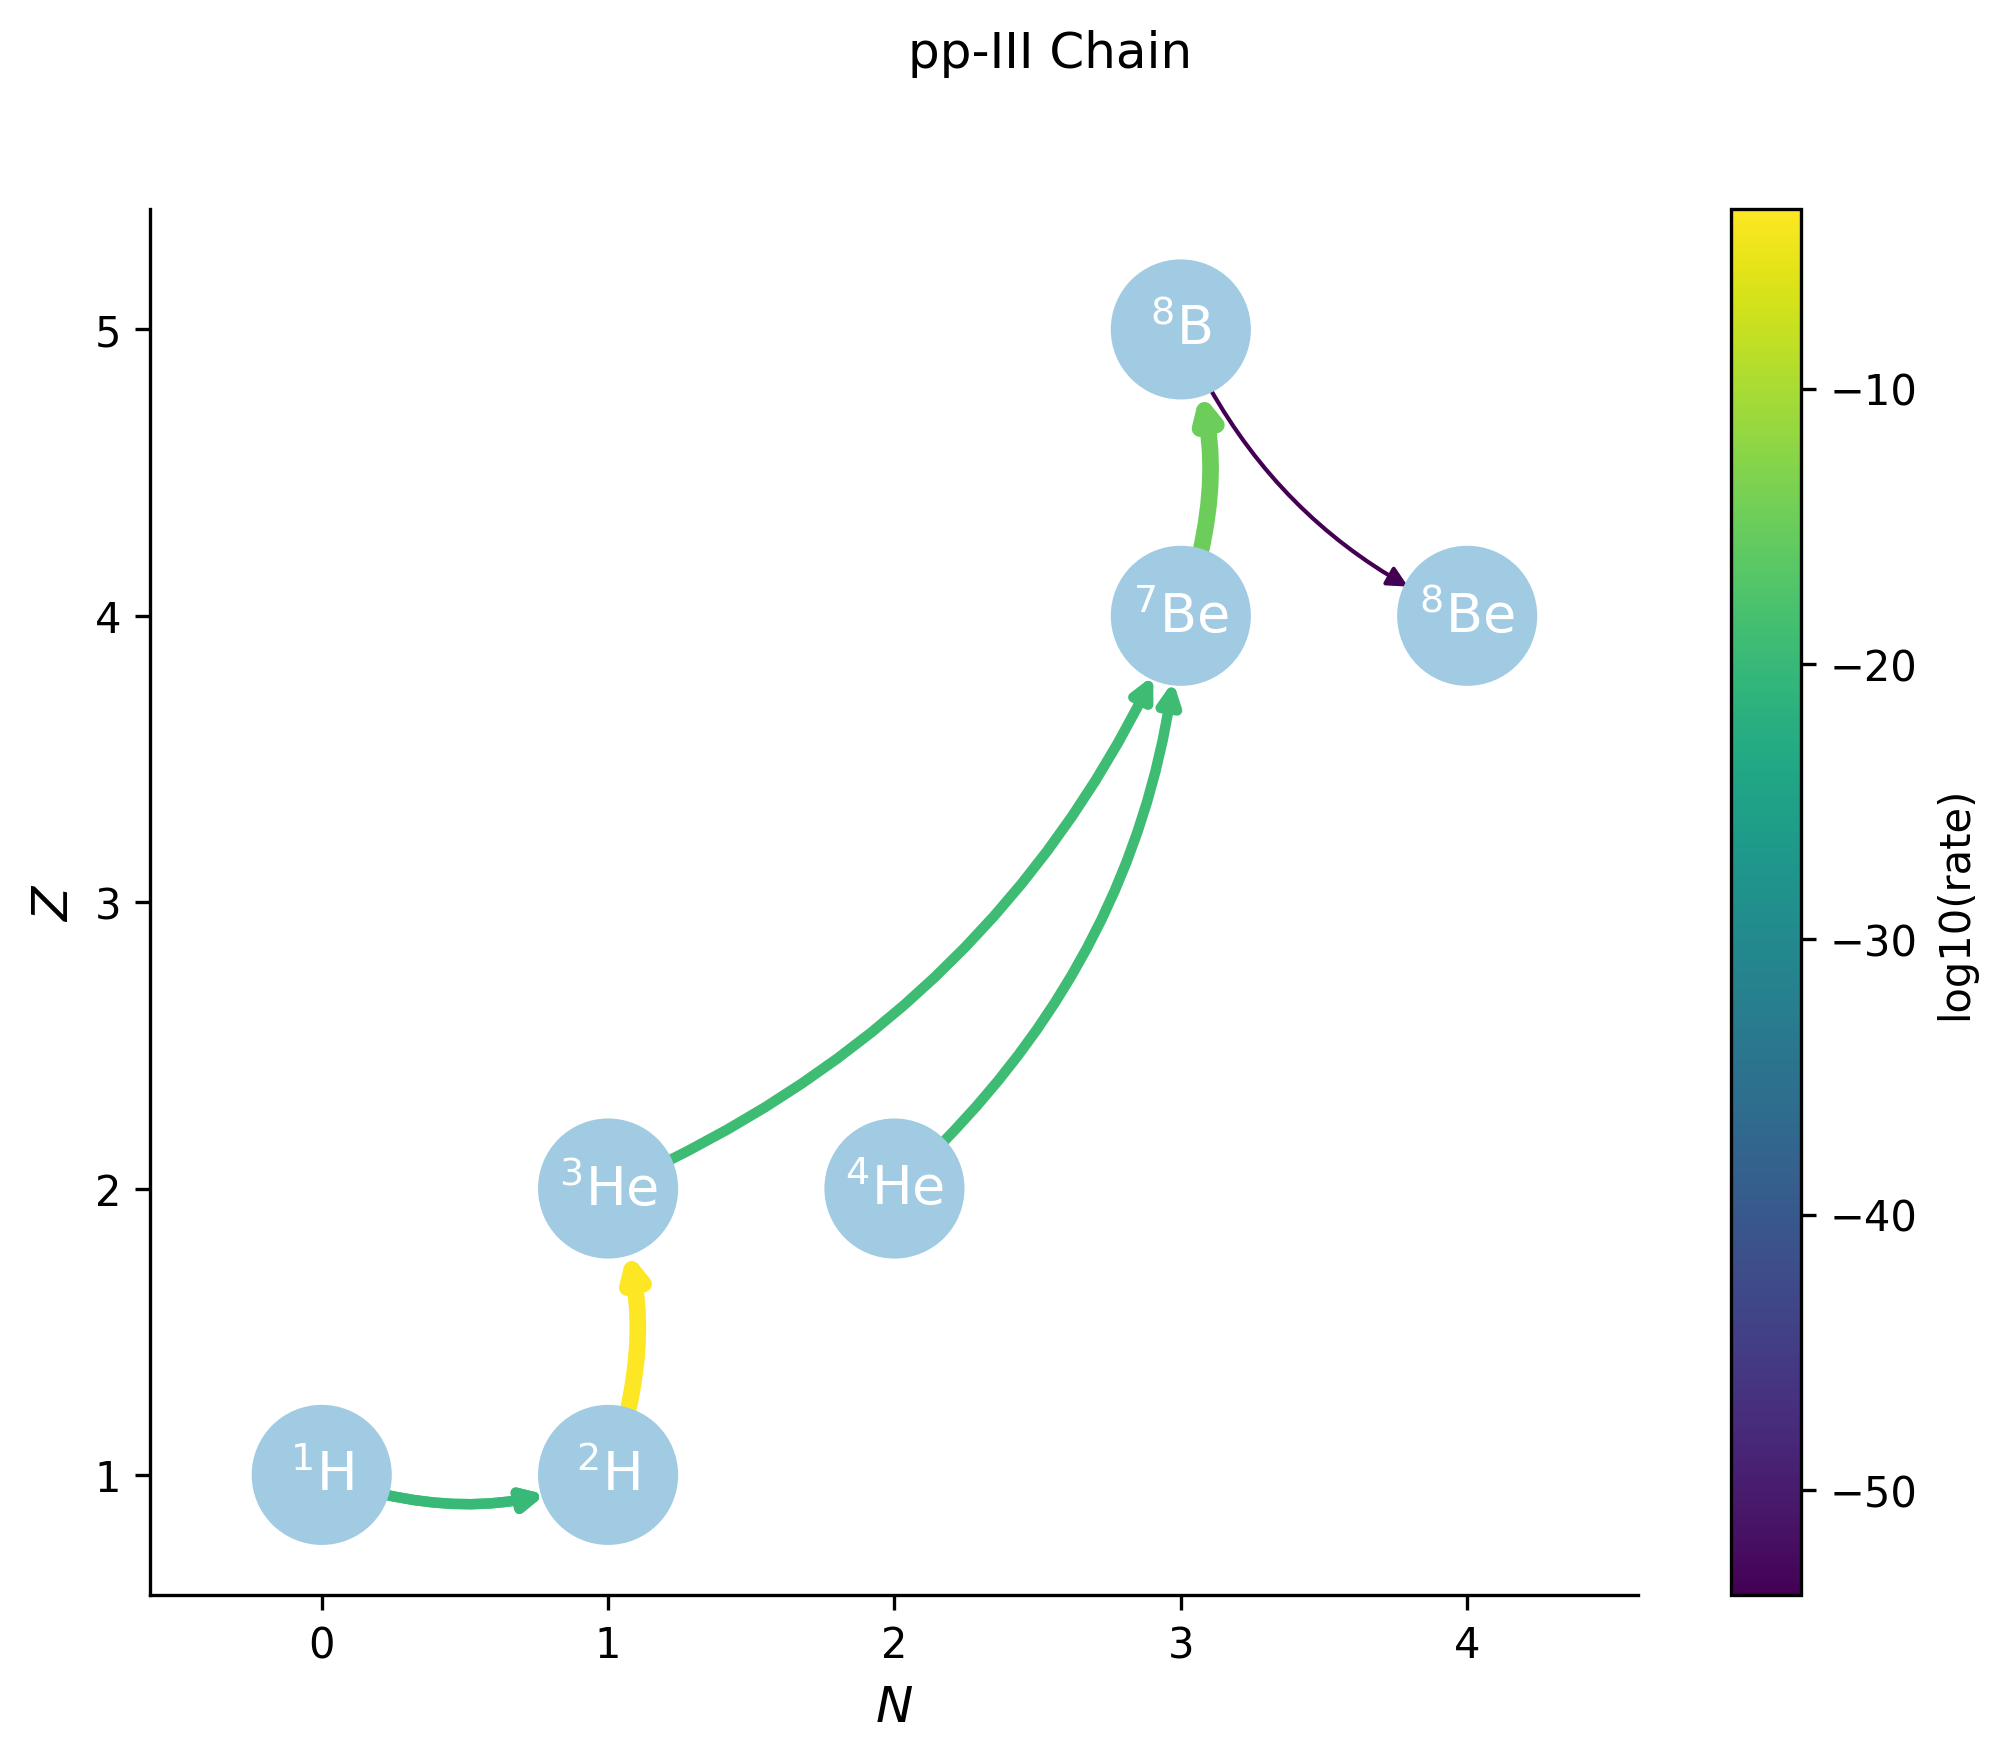

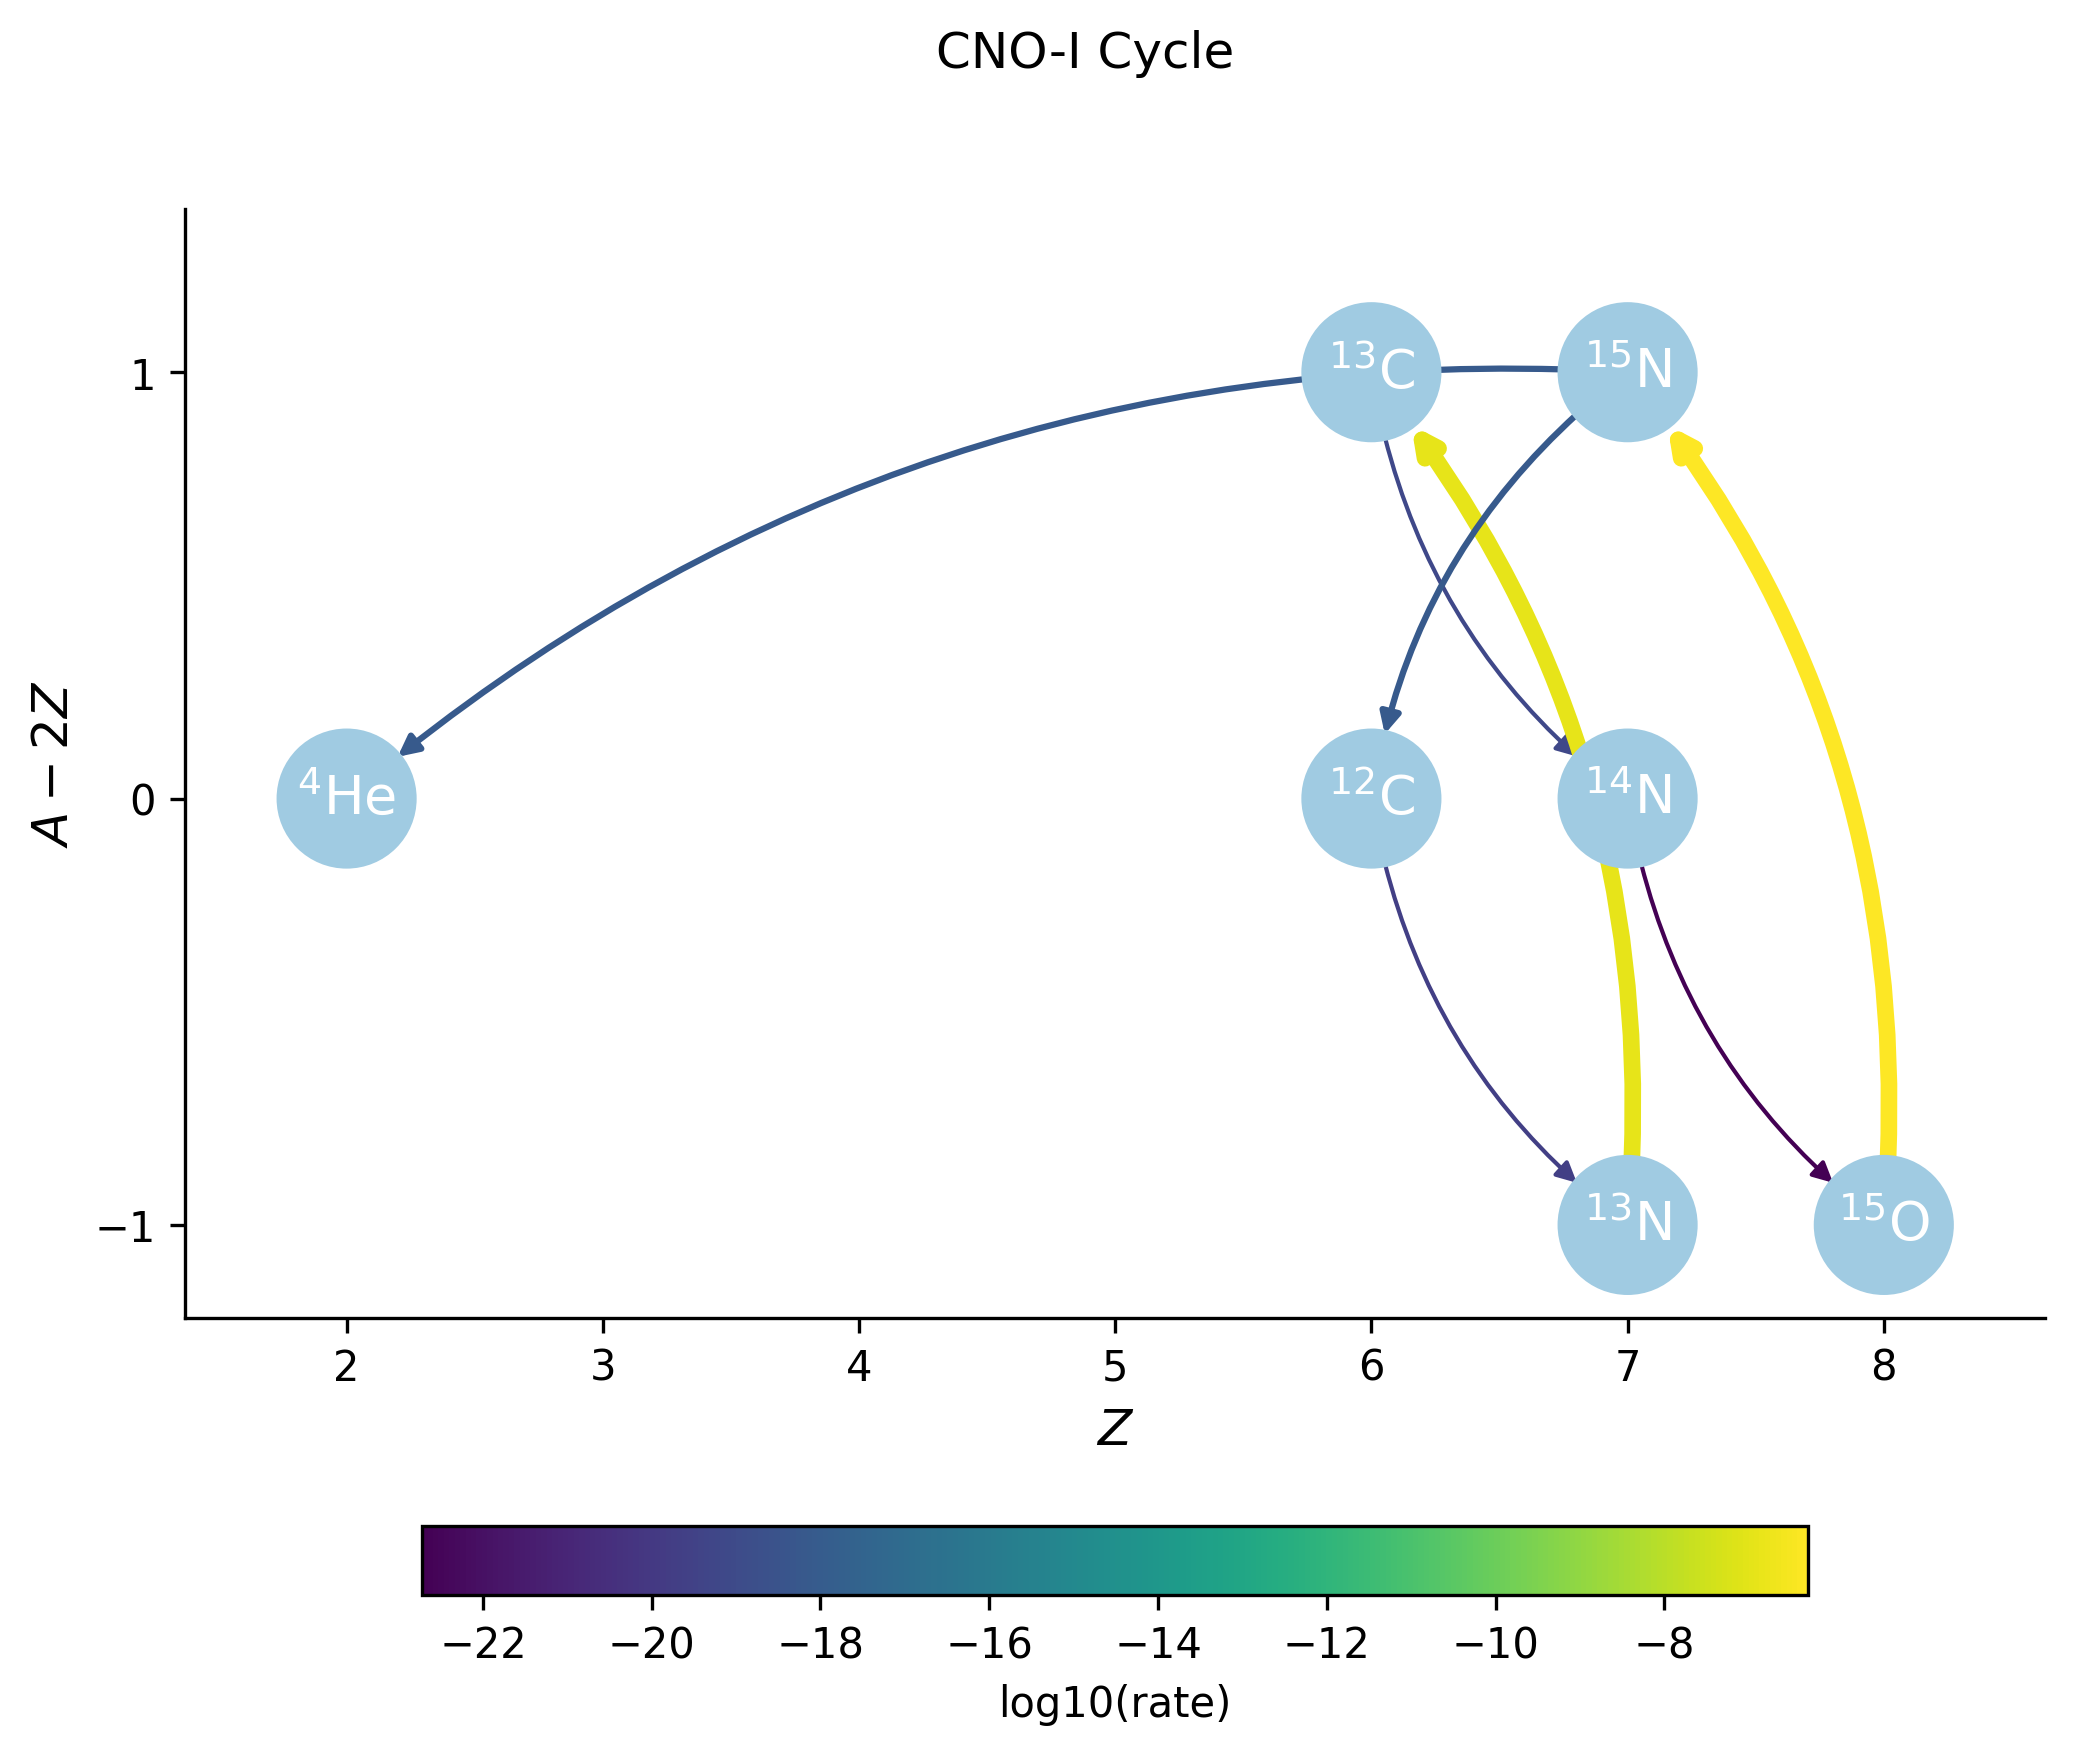

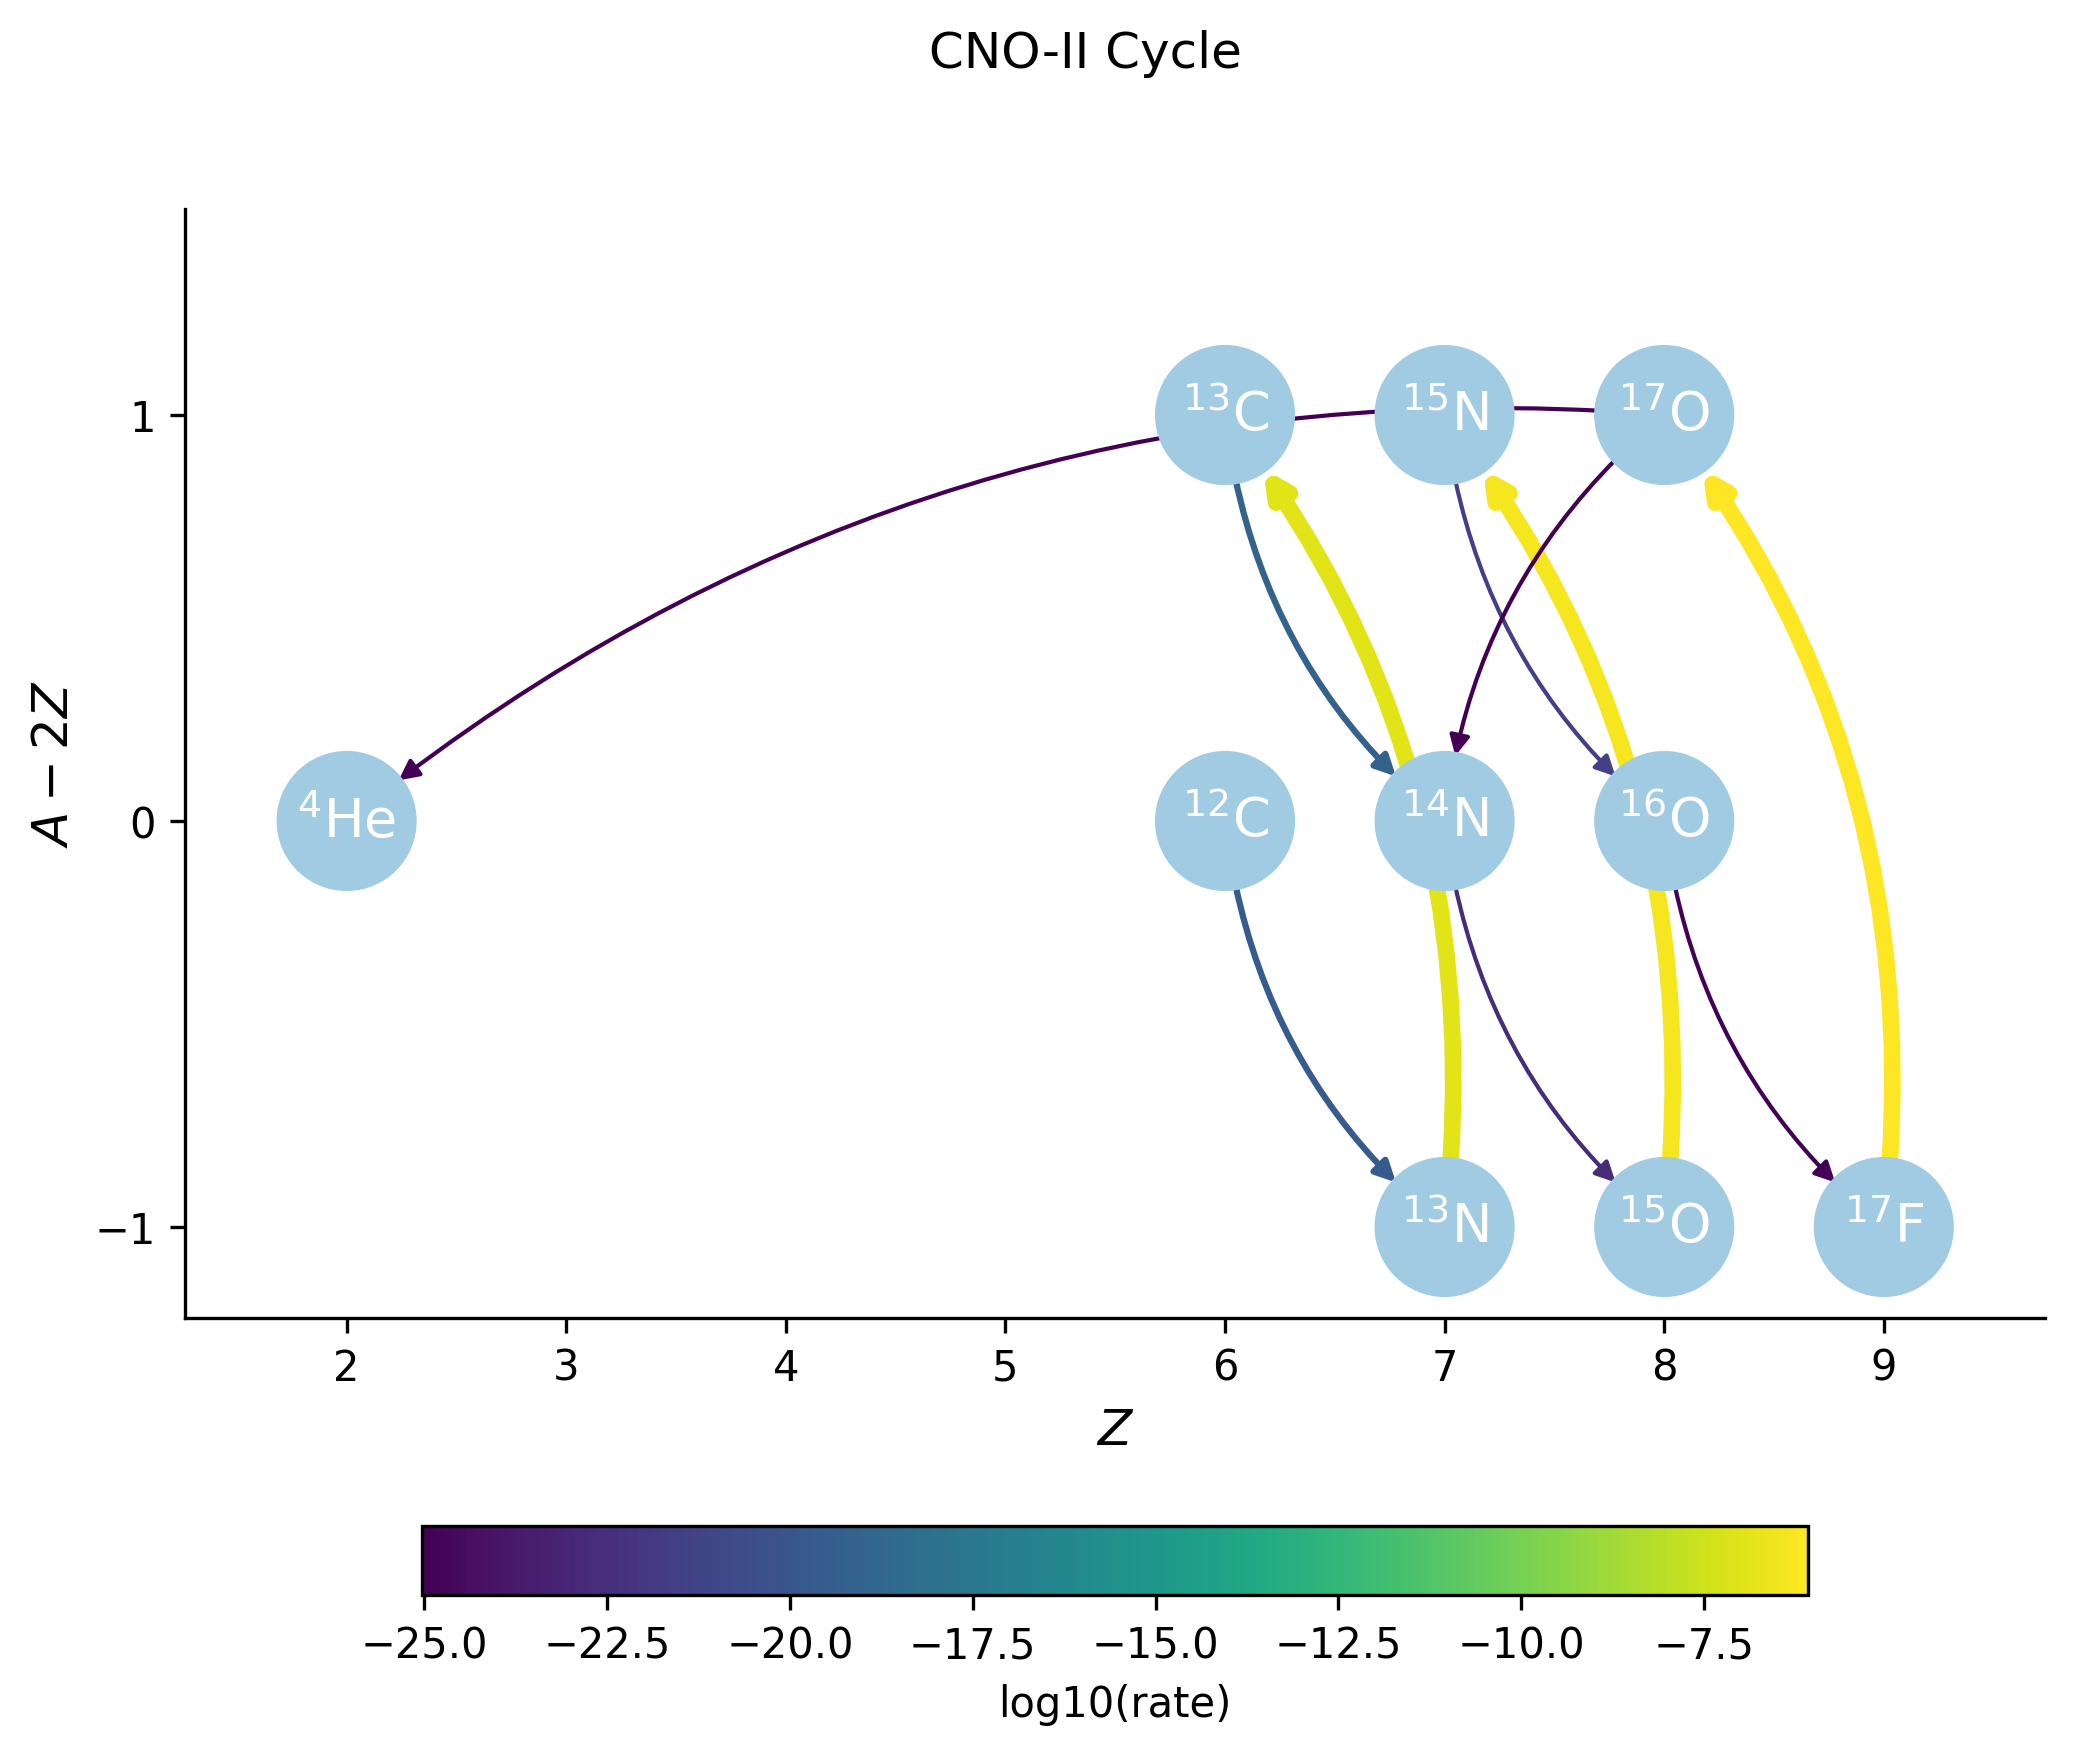

In [4]:
import pynucastro as pyna
import numpy as np
from pynucastro.rates import Rate
from pynucastro.nucdata import Nucleus
plt.rcParams['figure.dpi'] = 300

# Load the ReacLib library
rl = pyna.ReacLibLibrary()

# --- Define rates for each cycle/chain ---

# pp-I chain
pp1_rates_names = ["p(p,)d", "d(p,g)he3", "he3(he3,pp)he4"]
pp1_rates = rl.get_rate_by_name(pp1_rates_names)
net_pp1 = pyna.RateCollection(rates=pp1_rates)

# pp-II chain
pp2_rates_names = ["p(p,)d", "d(p,g)he3", "he3(a,g)be7", "be7(,)li7", "li7(p,a)he4"]
pp2_rates = rl.get_rate_by_name(pp2_rates_names)
net_pp2 = pyna.RateCollection(rates=pp2_rates)

# pp-III chain
pp3_rates_names = ["p(p,)d", "d(p,g)he3", "he3(a,g)be7", "be7(p,g)b8", "b8(,)be8", "be8(,he4)he4"]
# Note: Reaclib does not list b8 beta decay.
pp3_rates = rl.get_rate_by_name(pp3_rates_names)
net_pp3 = pyna.RateCollection(rates=pp3_rates)

# CNO-I cycle
cno1_rates_names = ["c12(p,g)n13", "n13(,)c13", "c13(p,g)n14", "n14(p,g)o15", "o15(,)n15", "n15(p,a)c12"]
cno1_rates = rl.get_rate_by_name(cno1_rates_names)
net_cno1 = pyna.RateCollection(rates=cno1_rates)

# CNO-II cycle (branch from N14 + p)
cno2_rates_names = ["c12(p,g)n13", "n13(,)c13", "c13(p,g)n14","n14(p,g)o15", "o15(,)n15", "n15(p,g)o16", "o16(p,g)f17", "f17(,)o17", "o17(p,a)n14"]
cno2_rates = rl.get_rate_by_name(cno2_rates_names)
net_cno2 = pyna.RateCollection(rates=cno2_rates)

# Set up composition for plotting (needed for rate evaluation)
all_nuclei = set()
for net in [net_pp1, net_pp2, net_pp3, net_cno1, net_cno2]:
    all_nuclei.update(net.unique_nuclei)
comp = pyna.Composition(list(all_nuclei))
comp.set_solar_like() # Use solar-like abundance for rate highlighting

# Using thermodynamic conditions we calculated in last section
Tc = 1.1e7 # K
rhoc = 275 # g/cm^3

fig_pp1 = net_pp1.plot(rho=rhoc, T=Tc, comp=comp, hide_xp=True, always_show_alpha=True, title="pp-I Chain")
fig_pp2 = net_pp2.plot(rho=rhoc, T=Tc, comp=comp, hide_xp=True, always_show_alpha=True,curved_edges=True, title="pp-II Chain")
fig_pp3 = net_pp3.plot(rho=rhoc, T=Tc, comp=comp, hide_xp=True, always_show_alpha=True,curved_edges=True, title="pp-III Chain")
fig_cno1 = net_cno1.plot(rho=rhoc, T=Tc, comp=comp, hide_xp=True, always_show_alpha=True,curved_edges=True,rotated=True, title="CNO-I Cycle")
fig_cno2 = net_cno2.plot(rho=rhoc, T=Tc, comp=comp, hide_xp=True, always_show_alpha=True,curved_edges=True,rotated=True, title="CNO-II Cycle")

We can identify the key rates (slowest rate) for each reaction:

In [5]:
print(net_pp1.evaluate_rates(rhoc, Tc, comp))
print(net_pp2.evaluate_rates(rhoc, Tc, comp))
print(net_pp3.evaluate_rates(rhoc, Tc, comp))
print(net_cno1.evaluate_rates(rhoc, Tc, comp))
print(net_cno2.evaluate_rates(rhoc, Tc, comp))

{p + p ⟶ H2 + e⁺ + 𝜈: 1.4771814828642797e-18, p + p + e⁻ ⟶ H2 + 𝜈: 1.3726843073185676e-20, H2 + p ⟶ He3 + 𝛾: 0.0003300937883557181, He3 + He3 ⟶ p + p + He4: 3.283709651063988e-17}
{p + p ⟶ H2 + e⁺ + 𝜈: 1.4771814828642797e-18, p + p + e⁻ ⟶ H2 + 𝜈: 1.3726843073185676e-20, H2 + p ⟶ He3 + 𝛾: 0.0003300937883557181, He3 + He4 ⟶ Be7 + 𝛾: 9.180645067809192e-20, Be7 + e⁻ ⟶ Li7 + 𝜈: 7.29490083111375e-11, Li7 + p ⟶ He4 + He4: 1.707921043550316e-08}
{p + p ⟶ H2 + e⁺ + 𝜈: 1.4771814828642797e-18, p + p + e⁻ ⟶ H2 + 𝜈: 1.3726843073185676e-20, H2 + p ⟶ He3 + 𝛾: 0.0003300937883557181, He3 + He4 ⟶ Be7 + 𝛾: 9.180645067809192e-20, Be7 + p ⟶ B8 + 𝛾: 1.7781048064705493e-15, B8 ⟶ Be8 + e⁺ + 𝜈: 1.500923031919697e-54}
{C12 + p ⟶ N13 + 𝛾: 2.208044537551502e-20, N13 ⟶ C13 + e⁺ + 𝜈: 1.1888341095211826e-07, C13 + p ⟶ N14 + 𝛾: 6.668734307238522e-20, N14 + p ⟶ O15 + 𝛾: 1.9097595155399543e-23, O15 ⟶ N15 + e⁺ + 𝜈: 5.050272707557393e-07, N15 + p ⟶ He4 + C12: 7.098396290649928e-19}
{C12 + p ⟶ N13 + 𝛾: 2.208044537551502e-

In [6]:
# Key rates
r_pp_key = rl.get_rate_by_name("p(p,)d")[0]
r_pp2_key = rl.get_rate_by_name("he3(a,g)be7") # Start of ppII/III branch
r_pp3_key = rl.get_rate_by_name("b8(,)be8")
r_cno1_key = rl.get_rate_by_name("n14(p,g)o15") # Slowest in CNO-I
r_cno2_key = rl.get_rate_by_name("o17(p,a)n14") # A key step in CNO-II

 Then we compare them in the same graph (with temperature):

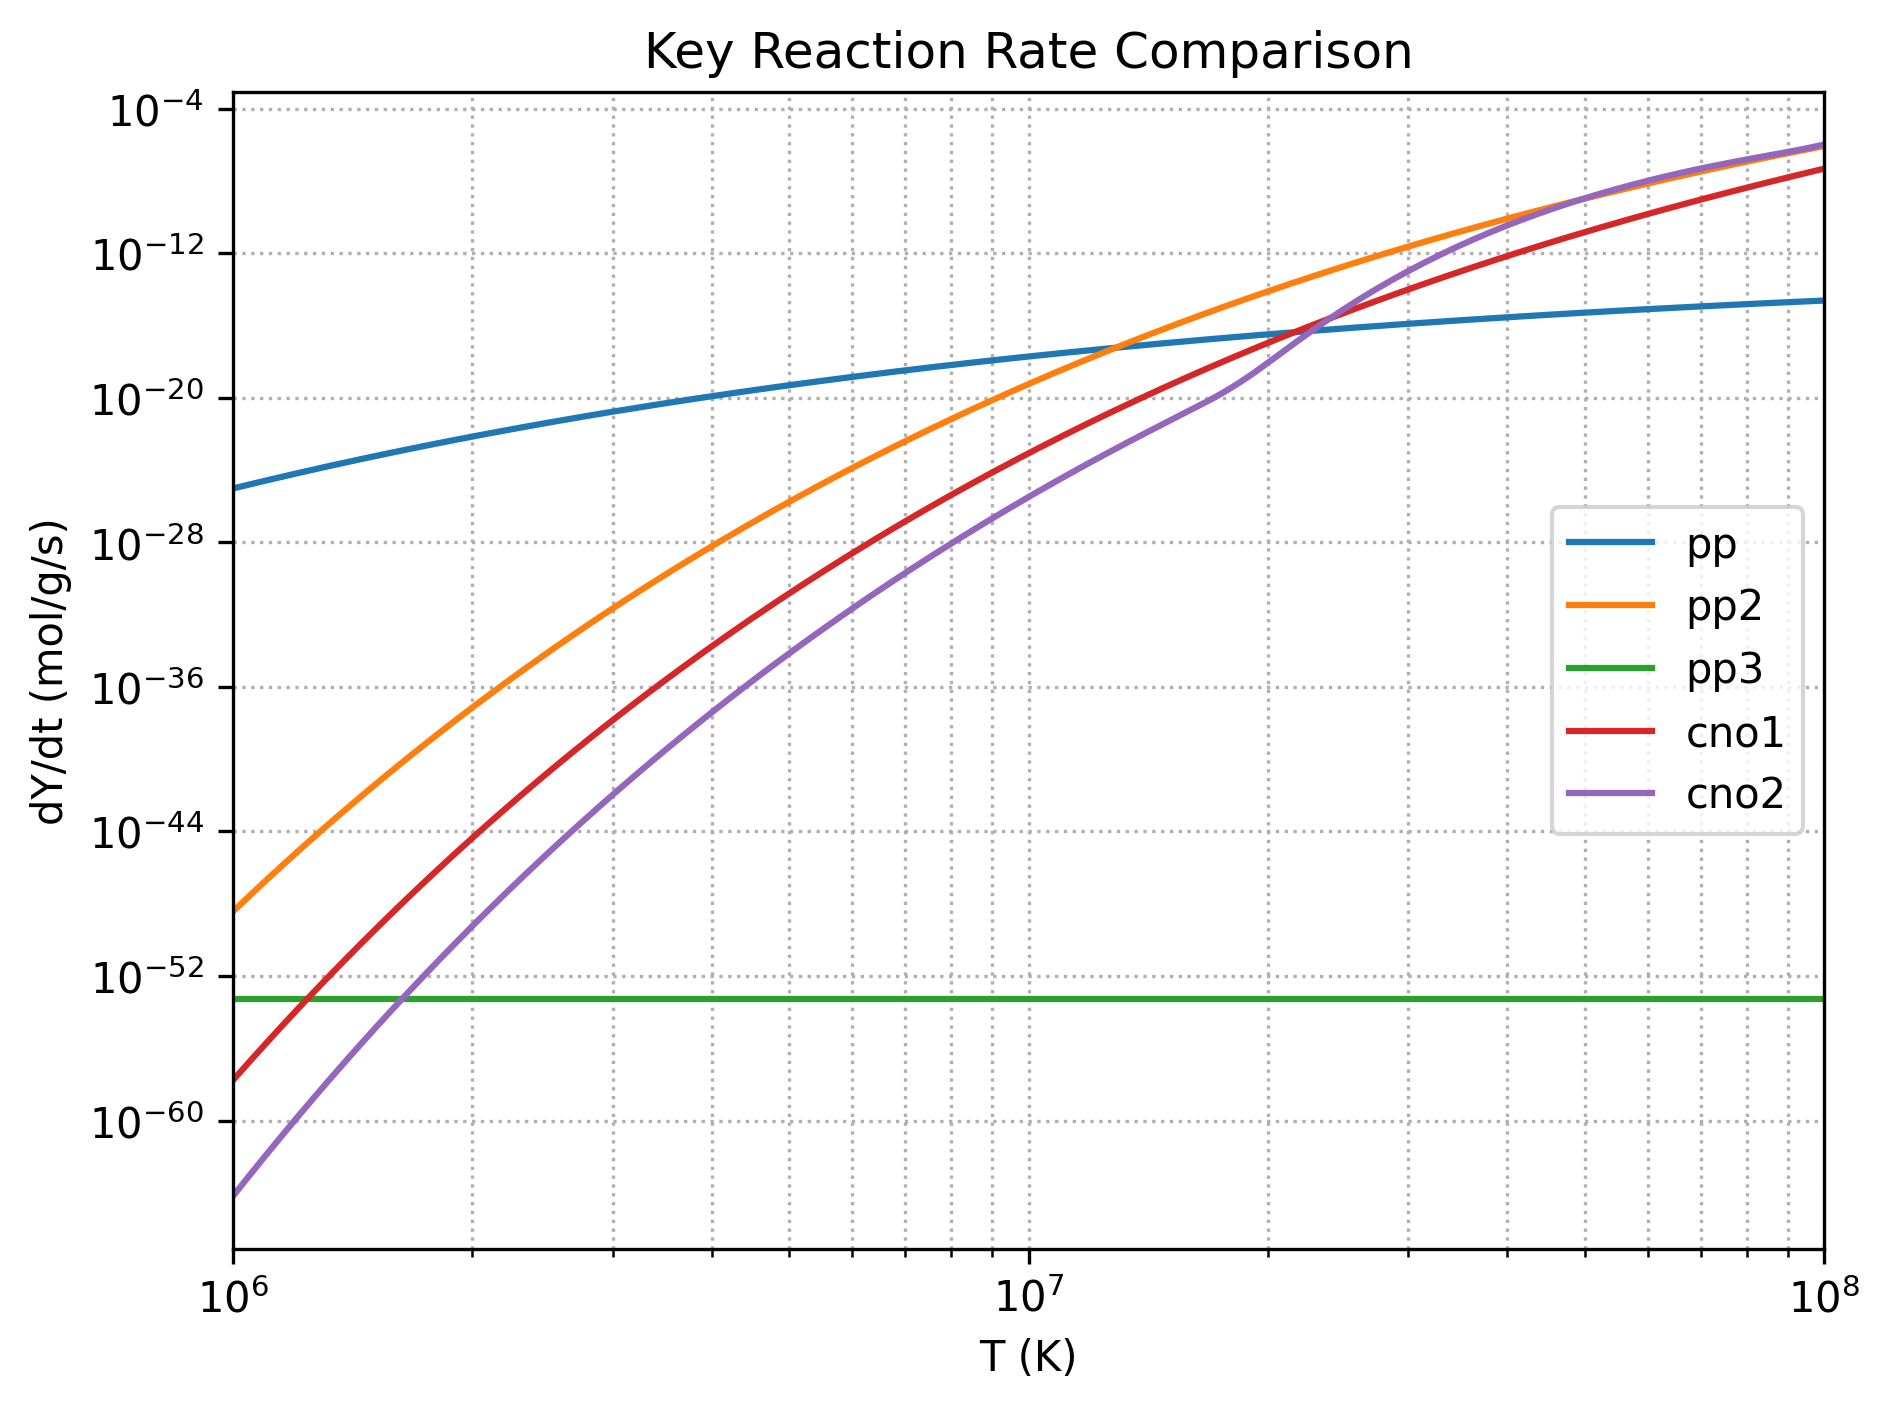

In [7]:
# Temperature range
Ts = np.logspace(6, 8, 200) # 10^6.8 K to 10^8 K

# Evaluate rates (need composition with relevant nuclei)
rate_eval_nuclei = {r_pp_key.reactants[0],
                    r_cno1_key.reactants[0], r_cno1_key.reactants[1],
                    r_pp2_key.reactants[0], r_pp2_key.reactants[1],
                    r_pp3_key.reactants[0],
                    r_cno2_key.reactants[0], r_cno2_key.reactants[1]}

# Get the nuclei for the rates we want to evaluate
comp_rate_eval = pyna.Composition(list(rate_eval_nuclei))
comp_rate_eval.set_solar_like()

# Calculate the abundances for the relevant nuclei
Y_p_arr = comp_rate_eval.X[Nucleus("p")] / Nucleus("p").A
Y_he3_arr = comp_rate_eval.X[Nucleus("he3")] / Nucleus("he3").A
Y_he4_arr = comp_rate_eval.X[Nucleus("he4")] / Nucleus("he4").A
Y_b8_arr = comp_rate_eval.X.get(Nucleus("b8"), 0.0) / Nucleus("b8").A
Y_n14_arr = comp_rate_eval.X[Nucleus("n14")] / Nucleus("n14").A
Y_o17_arr = comp_rate_eval.X.get(Nucleus("o17"), 0.0) / Nucleus("o17").A

# Calculate rates over temperature range 
# (Multiply by abundances and density for molar rate)
pp_key_eval = np.array([r_pp_key.eval(temp) for temp in Ts])
pp2_key_eval = np.array([r_pp2_key.eval(temp) for temp in Ts])
pp3_key_eval = np.array([r_pp3_key.eval(temp) for temp in Ts])
cno1_key_eval = np.array([r_cno1_key.eval(temp) for temp in Ts])
cno2_key_eval = np.array([r_cno2_key.eval(temp) for temp in Ts])

# Plotting the rates
fig_rates, ax_rates = plt.subplots()
ax_rates.loglog(Ts, pp_key_eval*rhoc*Y_p_arr**2, label=f"pp")
ax_rates.loglog(Ts, pp2_key_eval*rhoc*Y_he3_arr * Y_he4_arr, label=f"pp2")
ax_rates.loglog(Ts, pp3_key_eval*Y_b8_arr, label=f"pp3")
ax_rates.loglog(Ts, cno1_key_eval*rhoc*Y_n14_arr*Y_p_arr, label=f"cno1")
ax_rates.loglog(Ts, cno2_key_eval*rhoc*Y_o17_arr*Y_p_arr, label=f"cno2")

ax_rates.set_xlabel("T (K)")
ax_rates.set_ylabel(r"dY/dt (mol/g/s)")
ax_rates.set_xlim(1e6,1e8) # Adjust limit if needed
ax_rates.grid(linestyle=":", which="both")
ax_rates.legend()
ax_rates.set_title("Key Reaction Rate Comparison")
plt.tight_layout()

We see pp3 is actually much less significant compared with other four reactions.


### Total Reaction Network

Ignoring pp3, we build full reaction networks for our $0.3M_{\odot}$ star:

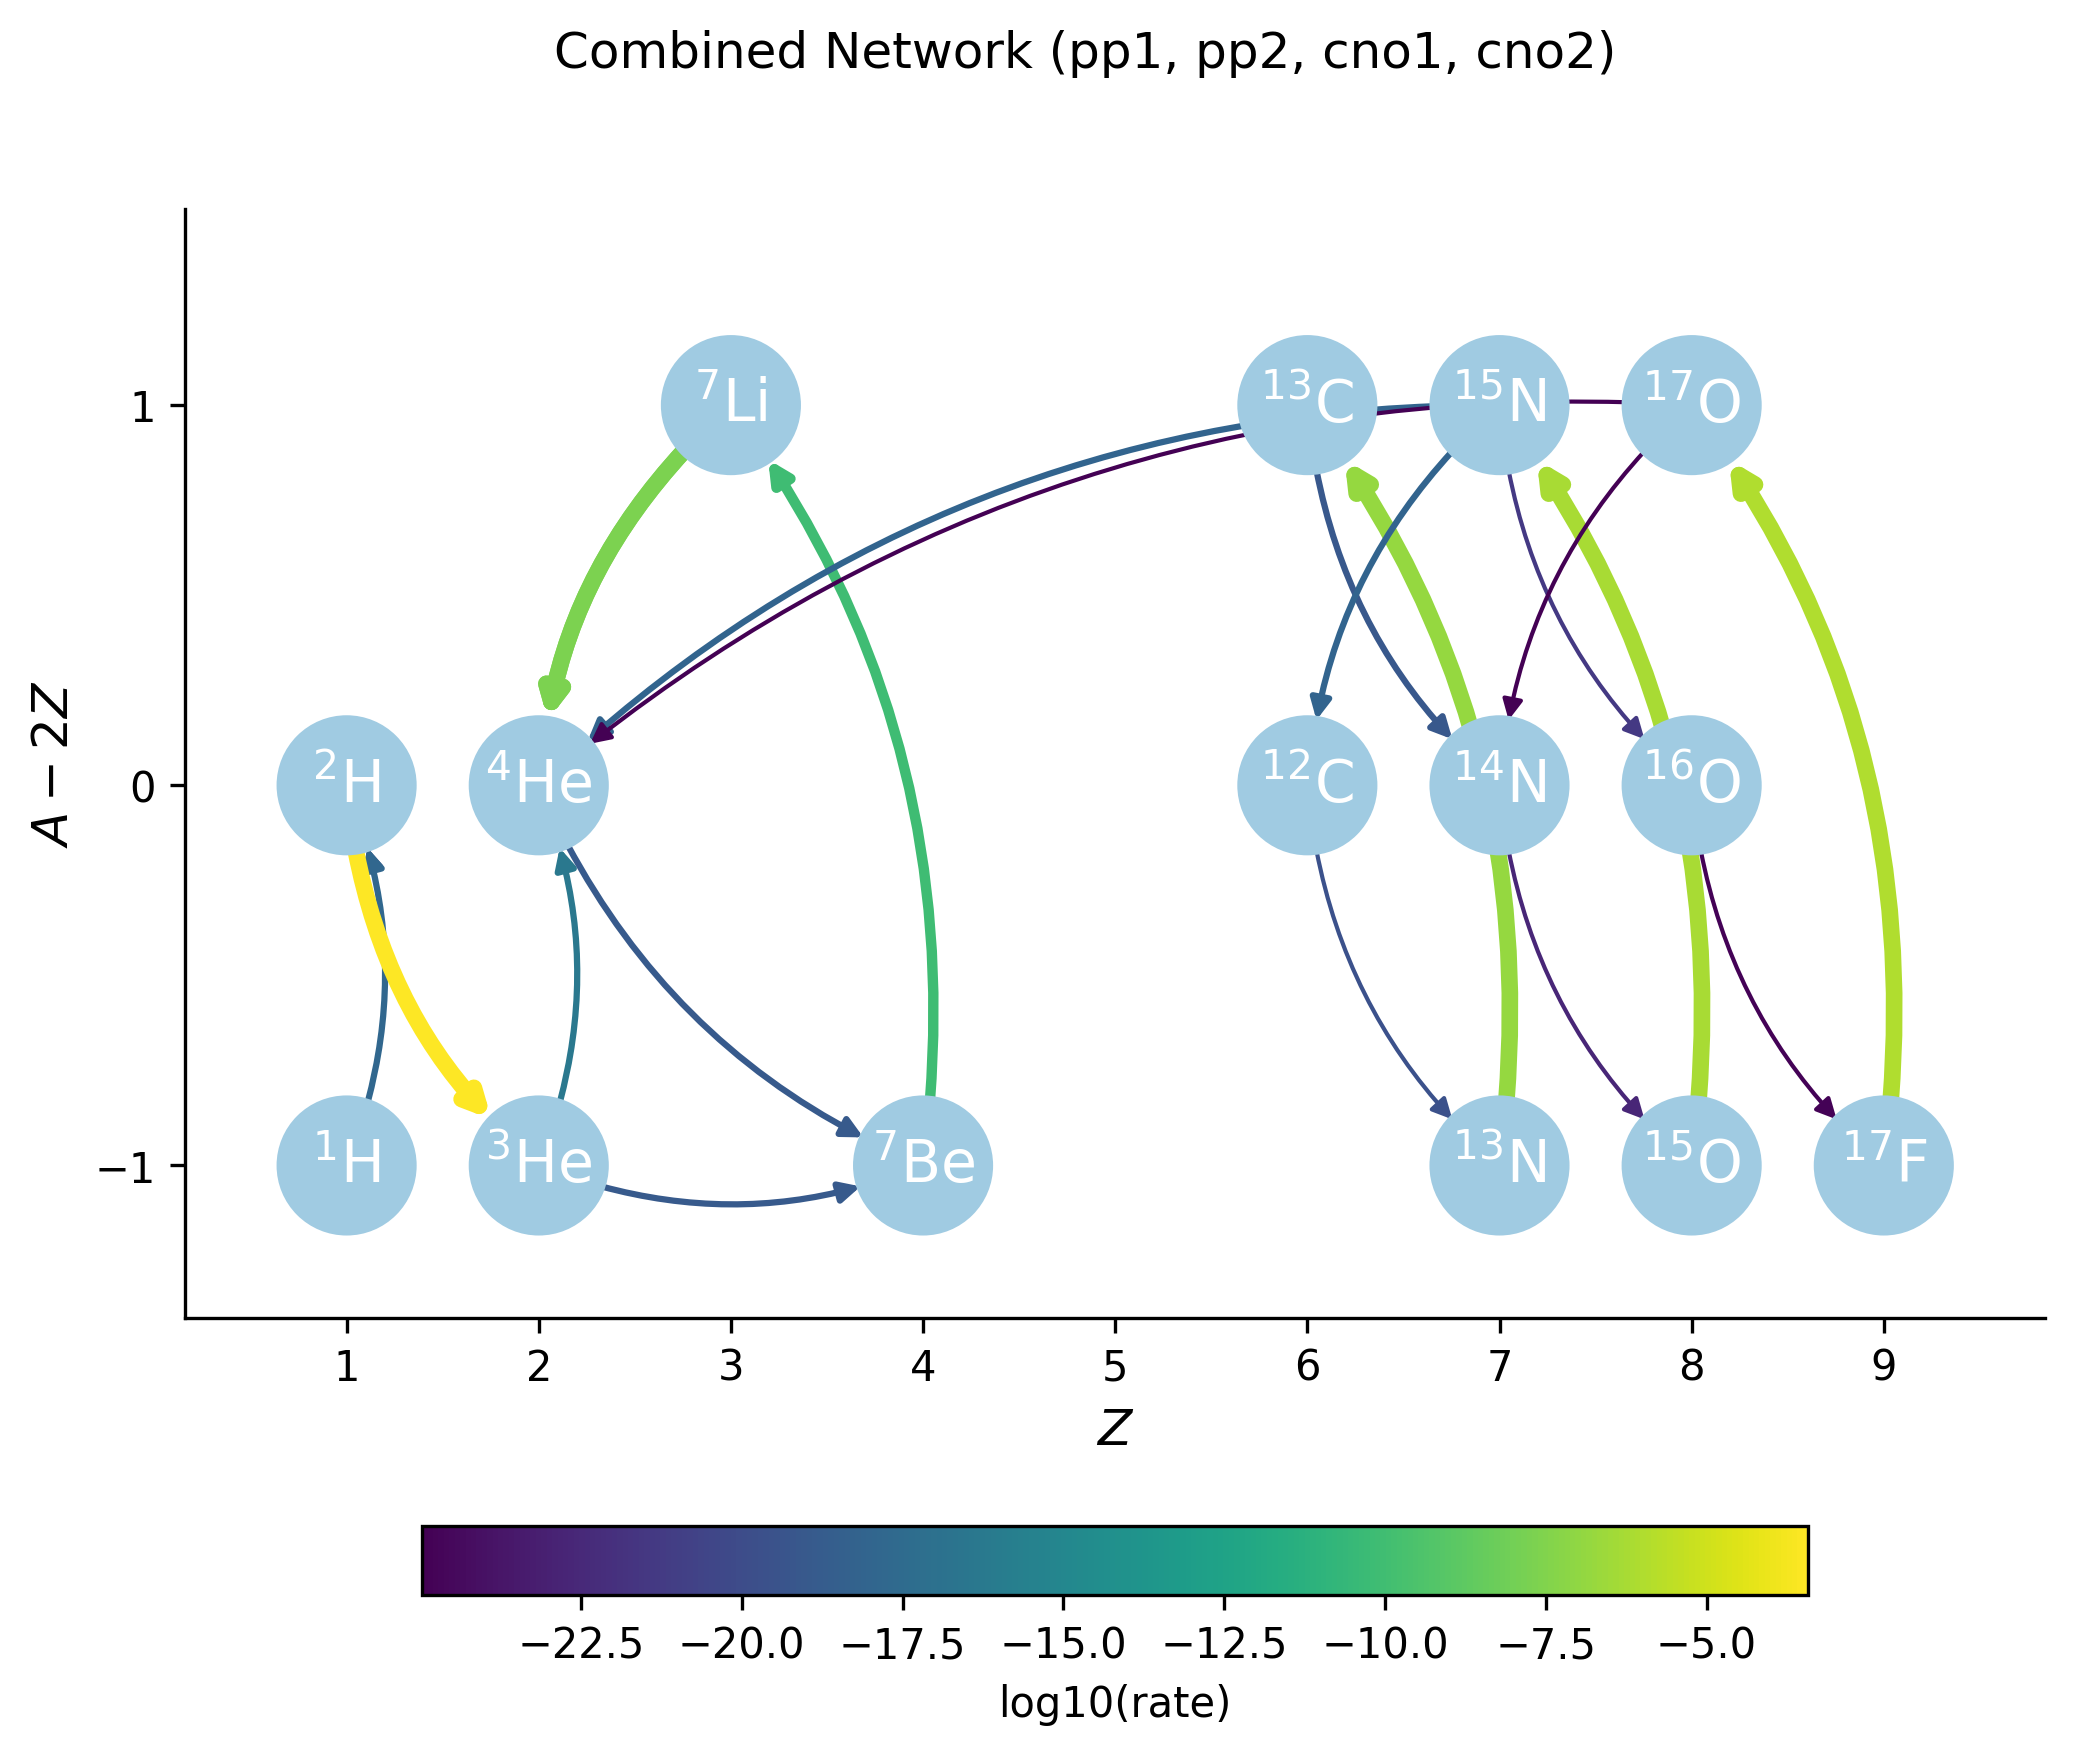

In [8]:
all_rates = list(set(pp1_rates + pp2_rates + cno1_rates + cno2_rates))
net_combined = pyna.RateCollection(rates=all_rates)

# Need composition with all nuclei for rate evaluation, but filtering nuclei for plotting
comp_combined = pyna.Composition(net_combined.unique_nuclei)
comp_combined.set_solar_like() #X = 0.7, Y = 0.28, Z = 0.02

fig_combined = net_combined.plot(rho=rhoc, T=Tc, comp=comp_combined, hide_xp=True,
                                 curved_edges=True,
                                 rotated=True,always_show_alpha=True,
                                 node_size=1000, node_font_size=14,
                                 title="Combined Network (pp1, pp2, cno1, cno2)")

plt.show()

Finally, we write the reaction network and import:

In [9]:
from typing_extensions import final
from pynucastro.networks import PythonNetwork
final_network = PythonNetwork(rates=all_rates)
nuclei_list_ordered = final_network.unique_nuclei # Get the actual nuclei in the network order
nuclei_specs_ordered = [n.spec_name for n in nuclei_list_ordered]
print(f"Network created with ordered nuclei (spec_name):\n {nuclei_list_ordered}")

# Write and import the network module
final_network.write_network(outfile="network.py")
import network as net
print(f"Successfully imported RHS function")

Network created with ordered nuclei (spec_name):
 [p, d, He3, He4, Li7, Be7, C12, C13, N13, N14, N15, O15, O16, O17, F17]
Successfully imported RHS function


### Composition Change over Time

To check our reaction network works properly, let's plot the compositon ($X$) and mean molecular weight ($\mu$) over time:


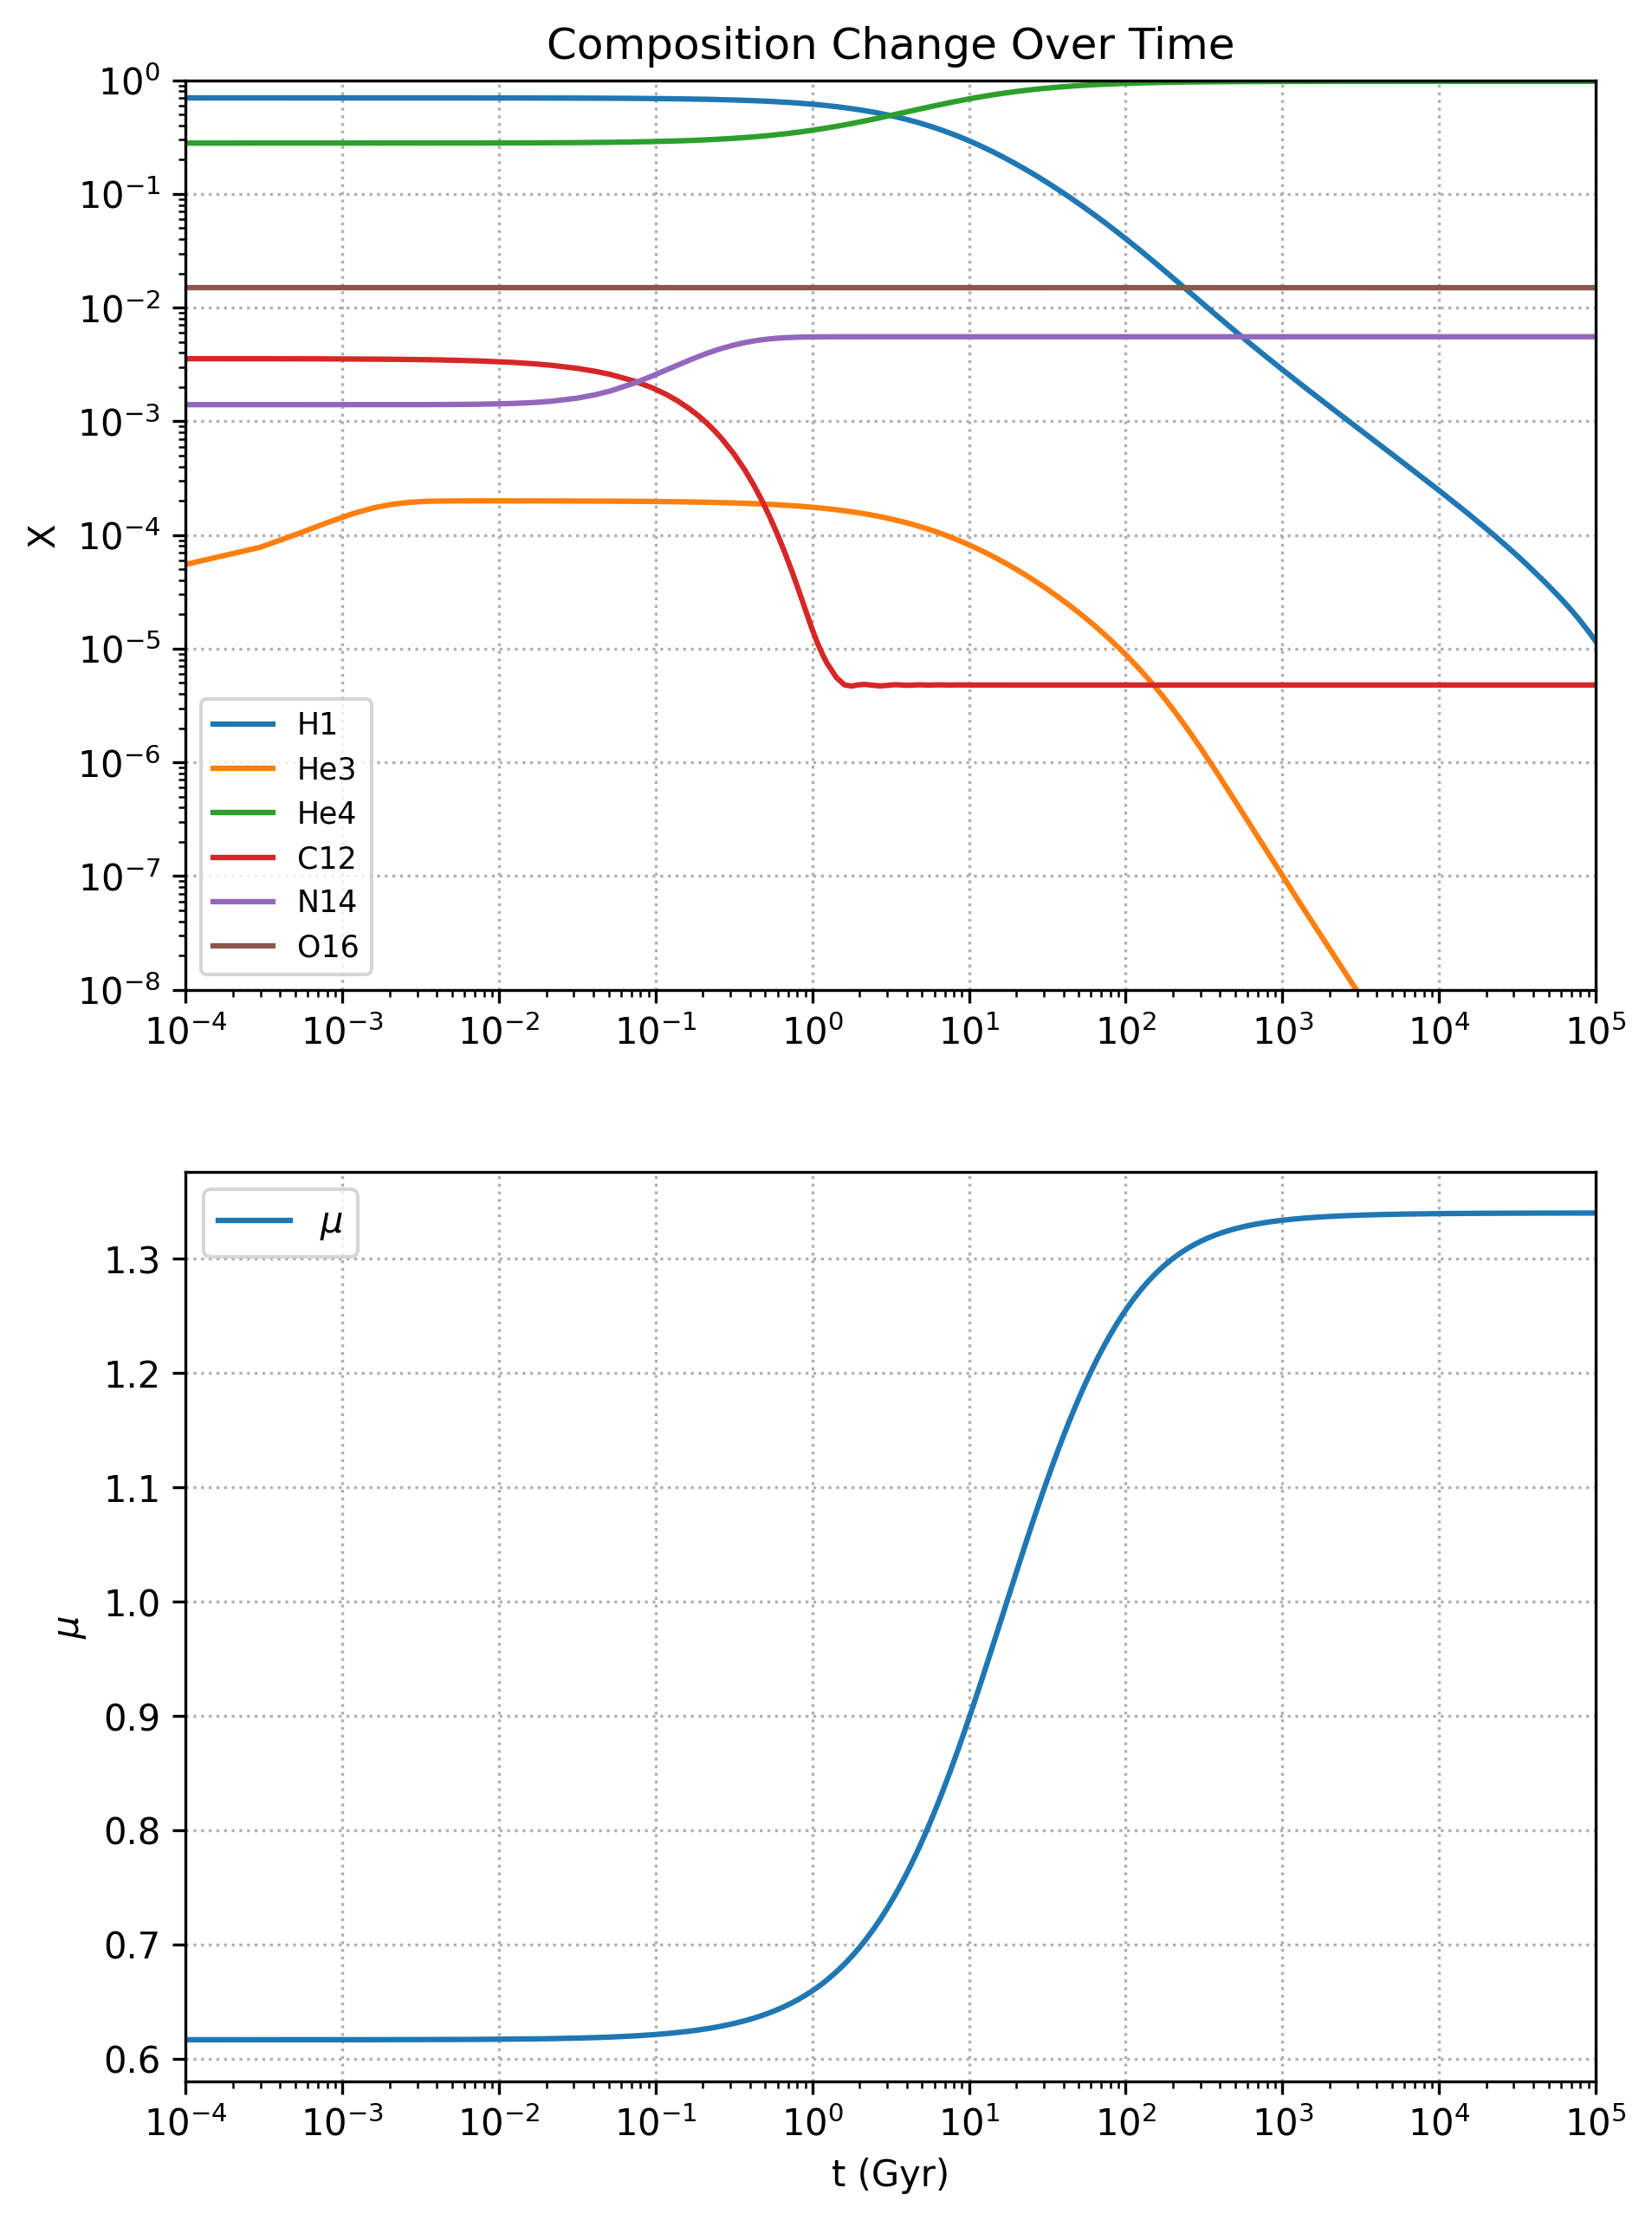

In [10]:
# A more detailed initial composition
X0 = np.zeros(net.nnuc)
X0[net.jp] = 0.7
X0[net.jhe3] = 0.4e-4
X0[net.jhe4] = 0.28
X0[net.jc12] = 0.00356
X0[net.jn14] = 0.0014
X0[net.jo16] = 0.015

Y0 = X0/net.A
tmax = 1.e22

# integrate dX/dt
sol = solve_ivp(net.rhs, [0, tmax], Y0, method="BDF", jac=net.jacobian,
                dense_output=True, args=(rhoc, Tc), rtol=1.e-7, atol=1.e-7)

# Calculate mean molecular weight
def get_mu(Y,network):
  i = 0
  one_over_mu = 0
  A = network.A
  Z = network.Z
  if np.ndim(Y) == 1:
    for name in range(len(A)):
        one_over_mu += Y[i]* network.A[i] * (1+Z[i]) / A[i]
        i+=1
  else:
    for name in range(len(A)):
        one_over_mu += Y[:,i]* network.A[i] * (1+Z[i]) / A[i]
        i+=1
  return  1/one_over_mu

# Plot figures
fig = plt.figure()
ax = fig.add_subplot(211)
tGyr = sol.t/ 1.0e9 / 3.154e7
# To avoid messy figure, only plot h1, he3, he4, c12, n14, o16
for i in [0,2,3,6,9,12]:
    ax.loglog(tGyr, sol.y[i,:] * net.A[i], label=f"{net.names[i].capitalize()}")
ax.set_xlim(1e-4, 1e5)
ax.set_ylim(1.e-8, 1.0)
ax.legend(fontsize="small")
ax.set_ylabel("X")
ax.grid(linestyle=":", which="major")
ax.set_title("Composition Change Over Time")

# Plot mu
ax = fig.add_subplot(212)
mu = np.array([get_mu(sol.sol(t), net) for t in sol.t])
ax.semilogx(tGyr, mu, label = f"$\\mu$")
ax.set_xlim(1e-4, 1e5)
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("$\\mu$")
ax.legend()
ax.grid(linestyle=":", which="major")
fig.set_size_inches((7, 10))

We see for a very long time (~1Gyr), $\mu\sim 0.6$, which is our initial composition. As the pp chain and CNO cycle starts, $\mu$ gradually increase to ~1.3, until the reaction completely stops at ~ 500 Gyr. This aligns with our expection that the red dwarf's lifetime is extremely long, even longer than the current age of the universe (13.8 Gyr).

Note: The abundance of O16 barely changes, which indicates CNO II cycle goes at a incredibly slow rate under this temperature. This aligns the fact that CNO II occurs only 0.04% of the time even for the Sun's (which is much heavier than a red dwarf).

## 4. Evolve the Star over Time

Now the static stellar structure equations are completely solved, we need to consider how to evolve the system over time. Unlike the original stellar evolution equations which are in PDEs (they are very hard to solve), our model is a static model donate by ODEs, so we can't directly get the time dependence from the equations. We have to find other ways. Look at the energy generation equation again:

$$L_{surf} = \int_0^R 4\pi r^2 \rho \epsilon dr$$

Donating the RHS as $L_{nuc}$ the equation becomes:

$$L_{surf} = L_{nuc}$$

We can evolve the system by letting $L_{nuc}$ equals to $L_{surf}$ from previous timestep:

$$L_{nuc}(t)=L_{surf}(t-\Delta t)$$

This is called **quasi-static thermoequilibrium**, which states that in a star approaching thermal equilibrium, the total energy generated internally by nuclear fusion in timestep $t$ must balance the energy radiated away from its surface in the previous timestep $t-\Delta t$.

Since $L_{nuc}(t)$ depends on temperature and density profiles (we see that in the previous section), which are given by $R_{star}$ and $\mu$ from our polytrope model, we need to find the specific $R_{star}$ that satisfies this condition ($\mu$ is known by the reaction network). We define a function representing the imbalance, $f(R) = L_{nuc}(t,R) - L_{surf}(t-\Delta t)$, where $L_{nuc}(t,R)$ is the luminosity calculated for a **trial radius** $R$. The `scipy.optimize.brentq` solver is then used to find the root of this function, effectively searching for the $R_{star}$ where the equation approximately holds. This resulting $R_{star}$ represents the radius the star adjusts to in order to maintain a quasi-static energy balance from the previous step. 

### Packing helper functions/classes
To make our life simpler, we can pack our previous code of calculating stellar profile into a class, and write a few functions that will be used in the following code:

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import brentq
from scipy import constants as const
import matplotlib.animation as animation

class get_stellar_profile:
    """
    Calculates mechenical and thermodynamic profiles
    for a star modeled as a polytrope, using derived numerical formulas.

    Assumes ideal gas equation of state. Outputs results in CGS units.

    Args:
        mu (float): Mean molecular weight (dimensionless).
        Tc (float): Central temperature (in Kelvin).
        n (float): Polytropic index (dimensionless).
        M_star (float): Total mass of the star (in grams).

    Methods: K(), rhoc(), R_star()
       Return K, rho_c, and R_star, respectively.
    """

    def __init__(self, mu, n, M_star, R_star, xi, theta):
        self.mu = mu
        self.R_star = R_star
        self.n = n
        self.M_star = M_star
        self.xi_1, self.D_n, self.M_n = polytropes[n].define_constants()
        self.xi = xi
        self.theta = theta

    def rhoc(self):
        rhoc = self.D_n * self.M_star / (4*np.pi*R_star**3/3)
        return rhoc

    def K(self):
        K = (4 * np.pi * G * self.R_star**2 * self.rhoc()**((self.n - 1) / self.n)) / ((self.n + 1) * self.xi_1**2)
        return K

    def rho(self):
        rho = (self.rhoc() * self.theta**self.n) + 1.e-18
        return rho

    def P(self):
        P = self.K() * self.rho()**(1+1/self.n)
        return P

    def T(self):
        T = self.P() * self.mu *m_H / self.rho() / k_B
        return T

    def Tc(self):
        return self.T()[0]

    def r(self):
        r = 1/self.xi_1*self.xi
        return r

    def q(self):
        dtheta_dxi = np.gradient(self.theta, self.xi)
        q = -self.xi**2*dtheta_dxi/self.M_n
        return q

def calculate_L_nuc(t, Y_prof_full, rho_profile, T_profile, q_profile, M_total, network_module):
    """Calculates total nuclear luminosity in erg/s using trapezoidal integration."""
    num_shells_lnuc = len(T_profile)
    if num_shells_lnuc < 2: return 0.0
    epsilon_profile = np.zeros(num_shells_lnuc)

    for i in range(num_shells_lnuc):
        if rho_profile[i] > 1e-18 and T_profile[i] > 1e3:
            try:
                # Use composition Y specific to this shell i
                dYdt_shell = network_module.rhs(t, Y_prof_full[i,:], rho_profile[i], T_profile[i])
                epsilon_profile[i] = network_module.energy_release(dYdt_shell)
            except Exception:
                epsilon_profile[i] = 0.0
        else:
            epsilon_profile[i] = 0.0

    epsilon_profile = np.nan_to_num(epsilon_profile)
    L_total = np.trapezoid(epsilon_profile, q_profile) * M_total
    return max(0.0, L_total) if np.isfinite(L_total) else 0.0

def mass_of_shell_i(i, q_profile_current, M_star_current):
    """Mass of shell i based on mass coordinate q. Uses midpoint approx."""
    num_shells = len(q_profile_current)
    if not (0 <= i < num_shells) or num_shells < 1: return 0.0
    if num_shells == 1: return M_star_current # Only one zone
    # Calculate q at midpoints between zones
    q_mid_prev = (q_profile_current[i-1] + q_profile_current[i]) / 2.0 if i > 0 else 0.0
    q_mid_next = (q_profile_current[i] + q_profile_current[i+1]) / 2.0 if i < num_shells - 1 else 1.0
    dq = max(0.0, q_mid_next - q_mid_prev) # Ensure no negative mass
    return dq * M_star_current

def calculate_average_mu(Y_prof, q_prof, M_tot, network_module):
    """ Calculates mass-averaged mean molecular weight mu """
    mu_prof = np.zeros(len(q_prof))
    for k in range(len(q_prof)):
        mu_prof[k] = get_mu(Y_prof[k,:], network_module)

    # mass-weighted average of mu
    if len(q_prof) < 2: return get_mu(Y_prof[0,:], network_module) if len(Y_prof)>0 else 1.0
    mu_avg = np.trapezoid(mu_prof, q_prof)
    return mu_avg

### Initialization

Calculate the initiall condition for the following evolution loop.

In [ ]:
# --- Physical Constants ---
G = const.G * 1e3  # cm^3 g^-1 s^-2
m_u = const.u * 1e3 # g
m_H = 1.00784 * m_u #
k_B = const.k * 1e7 # erg K^-1
m_sun = 1.98847e33 # g
r_sun = 6.957e10  # cm
L_sun = 3.828e33 # erg/s
sigma_sb = const.sigma * 1e3 # Stefan-Boltzmann constant

# --- Initial conditions from previous calculation ---
n = 1.5
M_star = 0.3 * m_sun
R_star = 0.25 * r_sun # I use a slightly larger radius to start a little bit prior to ZAMS

# --- Recalculate Initial State ---
# Number of spatial grid points
num_shells = len(xi)

# Initialize composition
Y_profile = np.tile(Y0, (num_shells, 1))

# Calculate initial average mu
mu0 = get_mu(Y0, net)

# Calculate Polytrope profile
profile = get_stellar_profile(mu0, n, M_star, R_star, xi, theta)
T = profile.T()
rho = profile.rho()
q = profile.q()
theta = polytropes[n].get_theta()
xi = polytropes[n].get_xi()

# Calculate Initial L and Teff ---
L0 = calculate_L_nuc(0.0, Y_profile, rho, T, q, M_star, net)
Teff0 = (L0 / (4.0 * np.pi * R_star**2 * sigma_sb))**0.25 if R_star > 0 and L0 > 0 else 0.0

print(f"Initial State: R={R_star/r_sun:.4f} R_sun, Mu_avg={mu0:.4f}, L_nuc={L0/L_sun:.3e} L_sun, Teff={Teff0:.0f} K")
print(f"Central conditions: Tc={profile.Tc():.2e} K, rhoc={profile.rhoc():.2e} g/cm^3")

Initial State: R=0.2500 R_sun, Mu_avg=0.6168, L_nuc=8.535e-03 L_sun, Teff=3509 K
Central conditions: Tc=9.22e+06 K, rhoc=1.62e+02 g/cm^3


### Evolution Solver

To determine the star's radius (`R_star`) at each timestep, a hybrid approach is used to handle the sensitive initial adjustment and subsequent evolution.

For the very first step after initialization, the new radius is assumed constannt (we will use a very small timestep). If we directly solve $L_{nuc}=L_{pre}$ here, we will see a jump in $R_\star$ and $T_{eff}$. This is because the initial $L$ is calculated in a different way, which is not continuous with the subsequent $L$. Since $T_{eff}$ is extremely sensitive, the discontinuous will cause a big jump.

For all subsequent timesteps, the algorithm attempts to enforce quasi-static thermal equilibrium by using the `brentq` root-finding method. This search adjusts the radius `R_star` until the total nuclear luminosity (`L_nuc`) calculated for the current structure and composition matches the total luminosity recorded at the end of the previous timestep (`L_prev`).

**Dynamic n assumption:** As the star evolves, more mass will concentrated in the core. In the end, the red dwarf will turns into a helium white dwarf. Since more mass is concentrated in the center, we will linearly increase our $n$ from 1.5 to ~3.0 thoughtout its 500 Gyr lifetime. (This is a rough assumption, but it gives a more physical result then fixing n = 1.5.) 

In [ ]:
# --- Parameters ---
t_end_Gyr = 1000 # Gyr
t_end_sec = t_end_Gyr * 1.0e9 * 3.154e7 # total time in seconds
model_number = 6000 # Limit of model number
# The simulation stops when either model number or t_end reaches
stepsize = 1e9
threshold_update = 0.000375 # Smaller makes n increase faster. 
# Determined by 0.001*(mu_final - mu_initial) / (n_final - n_initial)
#Default is 0.000375, which should reaches n=3.0 around 400 Gyr.

print(f"Starting evolution: {t_end_Gyr:.3f} Gyr in {model_number} steps")
# --- Initialize History Lists (to store profiles) ---
time_history = [0.0]
R_history = [R_star]
L_history = [L0]
n_history = [n] 
Teff_history = [Teff0]
mu_avg_history = [mu0] 
Y_history = [np.copy(Y_profile)] 
rho_history = [np.copy(rho)]
P_history = [np.copy(profile.P())] 
q_history = [np.copy(q)]
T_history = [np.copy(T)]
Tc_history = [profile.Tc()]
rhoc_history = [profile.rhoc()]

mu_for_last_updated_n = mu0 # Initialize adaptive step size

# --- Time Evolution Loop ---
for j in range(model_number):
    current_time_sec = time_history[-1]
    current_time_gyr = current_time_sec / (1.0e9 * 3.154e7)

    # Print title every 20 steps for readability
    if j%20 == 0: print(f"| model |  age(Gyr)  |   n   |   R   |  mu_avg  |   L   | T_eff(K) |  T_c(K)  |  rho_c  |")

    # State variables from the END of the previous step
    R_prev = R_history[-1]
    mu_avg_prev = mu_avg_history[-1] # Use previous average mu
    Y_profile_prev = np.copy(Y_history[-1]) # Composition profile at start of step
    L_prev = L_history[-1] # Luminosity from end of previous step

    # Get structure profiles (T, rho, q) corresponding to R_prev, mu_avg_prev
    try:
        profile_prev = get_stellar_profile(mu_avg_prev, n, M_star, R_prev, xi, theta)
        rho_prev = profile_prev.rho()
        T_prev = profile_prev.T()
        q_prev = profile_prev.q()
    except Exception as e_prof:
        print(f"FATAL: Failed to calculate profile at start of step {j+1}: {e_prof}")
        break

#-----------------------------------------------
    # Update Composition Profile (Evolve Y at each shell k)

    Y_profile_new = np.copy(Y_profile_prev)
    integration_failures = 0
    for k in range(num_shells): # Loop over spatial grid points
        Yk_start = Y_profile_prev[k,:]
        rhok_prev = rho_prev[k]
        Tk_prev = T_prev[k]
        if rhok_prev < 1e-12 or Tk_prev < 1e4:
            Y_profile_new[k,:] = Yk_start
            continue
        try:
            sol_k = solve_ivp(net.rhs, [0, stepsize], Yk_start,
                              args=(rhok_prev, Tk_prev), method='BDF',
                              jac=net.jacobian, rtol=1.e-7, atol=1.e-10)
            if not sol_k.success:
                integration_failures += 1
                Y_profile_new[k,:] = Yk_start
            else:
                Yk_end = sol_k.y[:, -1]
                Y_profile_new[k,:] = np.maximum(Yk_end, 1e-99)
        except Exception as e_ode:
            print(f"  Error during solve_ivp for shell k={k}: {e_ode}")
            integration_failures += 1
            Y_profile_new[k,:] = Yk_start
    if integration_failures > 0:
        print(f"Warning: Composition integration failed for {integration_failures}/{num_shells} shells.")
    Y_profile = Y_profile_new # Updated composition profile

    # Calculate new average mu based on the updated Y_profile
    mu_avg_current = calculate_average_mu(Y_profile, q_prev, M_star, net)

#----------------------------------------------
    # Update Radius R_star

    new_R_star = R_prev # Default

    if j == 0:
        new_R_star = R_prev 

    else:
        # --- Subsequent Steps (j>0): Use brentq targeting L_prev ---
        L_target = L_prev # Target is luminosity from end of previous step
        if L_target < 1e-99: L_target = 1e-99

        # Function for brentq 
        def find_R_for_L_target(r_trial, target_L, current_mu_avg, current_Y_prof):
         """Calculates L_nuc(r_trial) - target_L."""
         if r_trial <= 1e-5 * r_sun: return 1e99 * np.sign(target_L)
         try:
             prof_trial = get_stellar_profile(current_mu_avg, n, M_star, r_trial, xi, theta)
             rho_trial = prof_trial.rho()
             T_trial = prof_trial.T()
             q_trial = prof_trial.q()
             L_trial = calculate_L_nuc(current_time_sec + stepsize, current_Y_prof,
                                       rho_trial, T_trial, q_trial, M_star, net)
         except Exception as e:
             return 1e99 * np.sign(target_L) # Indicate error

         diff = L_trial - target_L
         return diff if np.isfinite(diff) else 1e99 * np.sign(target_L)

        R_low_bound = max(0.1 * r_sun, 0.5 * R_prev)
        R_high_bound = 2.0 * R_prev

        try:
            f_low = find_R_for_L_target(R_low_bound, L_target, mu_avg_current, Y_profile)
            f_high = find_R_for_L_target(R_high_bound, L_target, mu_avg_current, Y_profile)

            if not (np.isfinite(f_low) and np.isfinite(f_high)):
                 print(f"Warning: Cannot evaluate L_nuc at bounds. Keeping R constant.")
            elif np.sign(f_low) == np.sign(f_high):
                 print(f"Warning: Root-finding for R failed (no sign change). f(low)={f_low:.2e}, f(high)={f_high:.2e}. Keeping R constant.")
            else:
                 new_R_star = brentq(find_R_for_L_target, R_low_bound, R_high_bound,
                                     args=(L_target, mu_avg_current, Y_profile),
                                     xtol=1e-4*R_prev, rtol=1e-4) 
                 # Sanity check
                 if not (0.5 * R_prev < new_R_star < 2.0 * R_prev):
                      print(f"Warning: Moderate change in R ({R_prev/r_sun:.3f} -> {new_R_star/r_sun:.3f}).")

        except ValueError as e:
             print(f"Warning: brentq failed for R_star: {e}. Keeping R constant.")
        except Exception as e_gen:
             print(f"Warning: Unexpected error during R_star update: {e_gen}. Keeping R constant.")

    # --- Update R_star for the current step ---
    R_star = new_R_star

    # --- Check if we need to increase n
    if mu_avg_current - mu_for_last_updated_n >= threshold_update:
        n += 0.001 
        n = np.clip(n, 1.5, 3.0)
        n = np.round(n,3)
        theta = polytropes[n].get_theta()
        xi = polytropes[n].get_xi()
        mu_for_last_updated_n = mu_avg_current
        steps_n_change = 0
    else: steps_n_change +=1
        
#   Adaptive stepsize control. Iterate about 3 steps to increase n by 0.001
    if steps_n_change >= 6 and n<3: stepsize*= 2
    elif steps_n_change >=4 and n<3: stepsize*= 1.5 
    elif steps_n_change >=3 and n<3: stepsize*= 1.3
    elif steps_n_change >=2 and n<3: stepsize*= 1.2
    elif mu_avg_current - mu_avg_prev < threshold_update*2 and n<3: stepsize*= 0.9
    elif mu_avg_current - mu_avg_prev < threshold_update*1.5 and n<3: stepsize*= 0.6
    else: stepsize*= 1.00
        

# -----------------------------------------------------------
# Store history using the state at the END of the current step


    try:
        profile_current = get_stellar_profile(mu_avg_current, n, M_star, R_star, xi, theta)
        T_current = profile_current.T()
        rho_current = profile_current.rho()
        P_current = profile_current.P()
        q_current = profile_current.q()
        L_final = calculate_L_nuc(current_time_sec + stepsize, Y_profile, rho_current,
                                  T_current, q_current, M_star, net)
        Teff_final = (L_final / (4.0 * np.pi * R_star**2 * sigma_sb))**0.25 if R_star > 0 and L_final > 0 else 0.0

        if callable(getattr(profile_current, 'Tc', None)):
            Tc_final = profile_current.Tc()
            rhoc_final = profile_current.rhoc()
        else:
            Tc_final = profile_current.Tc
            rhoc_final = profile_current._rhoc

        time_history.append(current_time_sec + stepsize)
        n_history.append(n)
        R_history.append(R_star)
        L_history.append(L_final)
        Teff_history.append(Teff_final)
        mu_avg_history.append(mu_avg_current)
        Y_history.append(np.copy(Y_profile))
        T_history.append(np.copy(T_current))
        rho_history.append(np.copy(rho_current))
        P_history.append(np.copy(P_current))
        q_history.append(np.copy(q_current))
        Tc_history.append(Tc_final)
        rhoc_history.append(rhoc_final)

        print(f"{j:5}{current_time_gyr:15.4e}{n:7.3f}{R_star/r_sun:10.4f}{mu_avg_current:9.4f}{L_final/L_sun:9.4f}{Teff_final:8.0f}{Tc_final:14.2e}{rhoc_final:9.2f}")

    except Exception as e_final_prof:
        print(f"FATAL: Failed to calculate final profile for history step {j+1}: {e_final_prof}")
        break # Stop simulation if final state calculation fails

    if current_time_gyr >= t_end_Gyr: break # Stop simulation if time limit reached

Starting evolution: 1000.000 Gyr in 6000 steps
| model |  age(Gyr)  |   n   |   R   |  mu_avg  |   L   | T_eff(K) |  T_c(K)  |  rho_c  |
    0     0.0000e+00  1.501    0.2500   0.6231   0.0437    5278      9.31e+06   162.36
    1     3.1706e-08  1.501    0.2501   0.6231   0.0433    5266      9.31e+06   162.14
    2     6.0241e-08  1.501    0.2501   0.6231   0.0433    5266      9.31e+06   162.14
    3     9.4483e-08  1.501    0.2501   0.6231   0.0433    5266      9.31e+06   162.13
    4     1.3900e-07  1.501    0.2501   0.6231   0.0433    5265      9.31e+06   162.12
    5     2.0577e-07  1.501    0.2501   0.6231   0.0433    5265      9.31e+06   162.11
    6     3.0593e-07  1.501    0.2501   0.6231   0.0433    5265      9.31e+06   162.11
    7     5.0625e-07  1.501    0.2501   0.6231   0.0433    5265      9.31e+06   162.10
    8     9.0688e-07  1.501    0.2501   0.6231   0.0433    5264      9.31e+06   162.09
    9     1.7081e-06  1.501    0.2501   0.6231   0.0433    5264      9.31e+06   

We can save all data to a single pkl file if we want to use them somewhere else in the future.

In [53]:
import pandas as pd

data = {
    'model_number': np.arange(len(time_history)),
    'time': time_history,
    'R_star': R_history,
    'L': L_history,
    'T_eff': Teff_history,
    'n': n_history,
    'mu_avg': mu_avg_history,
    'T_c': Tc_history,
    'rho_c': rhoc_history,
    'Y_profile': Y_history,
    'rho_profile': rho_history,
    'P_profile': P_history,
    'q_profile': q_history,
    'T_profile': T_history
}
df = pd.DataFrame(data)
df.to_pickle('stellar_evolution_data.pkl')

## 5. Visulization

An example output animation is avaliable [here](https://github.com/sy-xia/AST-390/tree/main) (accelerated).

In [ ]:
# Load the data from the pickle file if needed
import pandas as pd
data = pd.read_pickle('stellar_evolution_data.pkl')
time_history = data['time'].values
R_history = data['R_star'].values
L_history = data['L'].values
n_history = data['n'].values
Teff_history = data['T_eff'].values
Tc_history = data['T_c'].values
mu_avg_history = data['mu_avg'].values
rhoc_history = data['rho_c'].values
model_number = data['model_number'].values
Y_history = data['Y_profile'].values
rho_history = data['rho_profile'].values  
P_history = data['P_profile'].values
q_history = data['q_profile'].values
T_history = data['T_profile'].values

Saving animation to stellar_evolution_animation.mp4 (this may take a while)...
Animating frame 1/5554
Animating frame 1/5554
Animating frame 2/5554
Animating frame 3/5554
Animating frame 4/5554
Animating frame 5/5554
Animating frame 6/5554
Animating frame 7/5554
Animating frame 8/5554
Animating frame 9/5554
Animating frame 10/5554
Animating frame 11/5554
Animating frame 12/5554
Animating frame 13/5554
Animating frame 14/5554
Animating frame 15/5554
Animating frame 16/5554
Animating frame 17/5554
Animating frame 18/5554
Animating frame 19/5554
Animating frame 20/5554
Animating frame 21/5554
Animating frame 22/5554
Animating frame 23/5554
Animating frame 24/5554
Animating frame 25/5554
Animating frame 26/5554
Animating frame 27/5554
Animating frame 28/5554
Animating frame 29/5554
Animating frame 30/5554
Animating frame 31/5554
Animating frame 32/5554
Animating frame 33/5554
Animating frame 34/5554
Animating frame 35/5554
Animating frame 36/5554
Animating frame 37/5554
Animating frame 38/

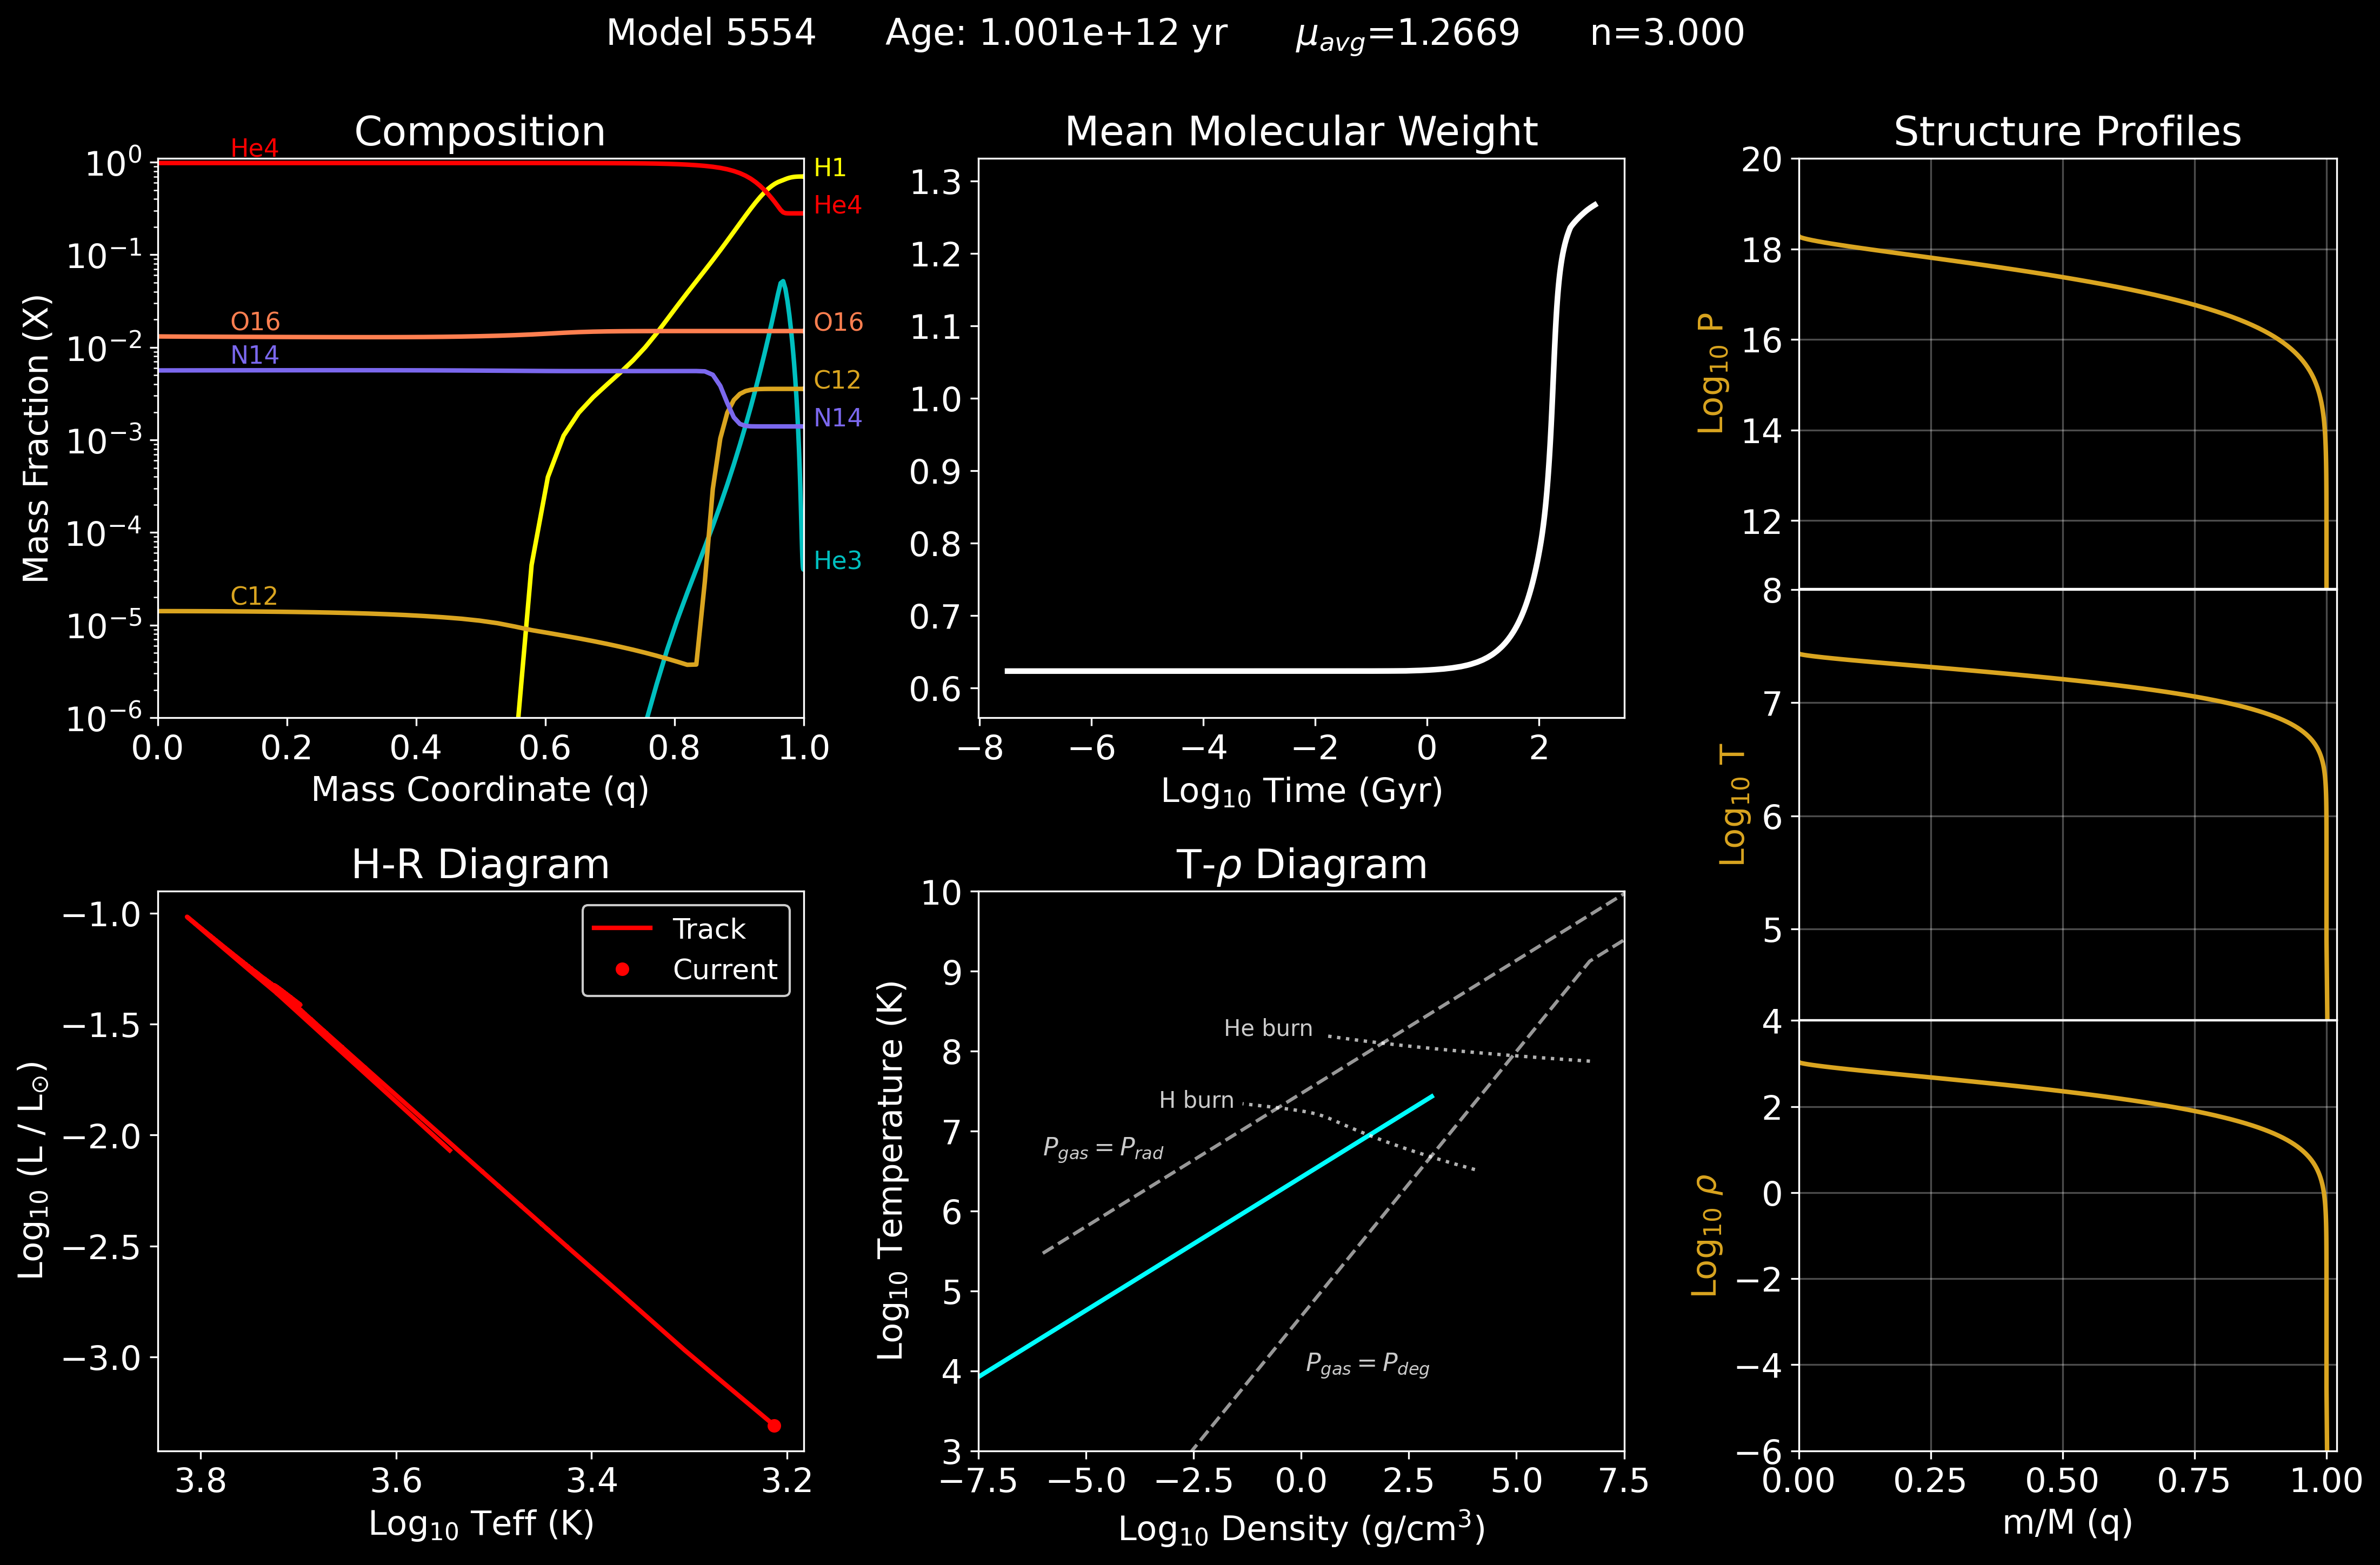

In [52]:
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import matplotlib.pyplot as plt
import network as net
import numpy as np
import matplotlib.animation as animation

# --- Matplotlib Styling ---
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor": "black", "axes.facecolor": "black",
    "axes.edgecolor": "white", "axes.labelcolor": "white",
    "xtick.color": "white", "ytick.color": "white",
    "text.color": "white", "axes.titlecolor": "white",
    "legend.facecolor": "black", "legend.edgecolor": "white",
    "legend.labelcolor": "white"
})
plt.rcParams['font.size'] = 15

# --- Species Indices and Colors ---
idx_h1 = net.jp; idx_he3 = net.jhe3; idx_he4 = net.jhe4
idx_c12 = net.jc12; idx_n14 = net.jn14; idx_o16 = net.jo16
comp_indices = [idx_h1, idx_he3, idx_he4, idx_c12, idx_n14, idx_o16]
comp_labels = ['H1', 'He3', 'He4', 'C12', 'N14', 'O16']
comp_colors = ['yellow', 'c', 'red', 'goldenrod' ,'mediumslateblue', 'coral']

# --- Create Figure and GridSpec Layout ---
fig = plt.figure(figsize=(15, 10))
gs_main = GridSpec(2, 3, figure=fig, width_ratios=[1.2, 1.2, 1], height_ratios=[1, 1])

# --- Define Axes ---
ax_comp = fig.add_subplot(gs_main[0, 0])   # Top Left
ax_mu = fig.add_subplot(gs_main[0, 1])     # Top Middle
ax_hr = fig.add_subplot(gs_main[1, 0])     # Bottom Left
ax_trho = fig.add_subplot(gs_main[1, 1])   # Bottom Middle
gs_right = GridSpecFromSubplotSpec(3, 1, subplot_spec=gs_main[:, 2], hspace=0.002) 
ax_p = fig.add_subplot(gs_right[0])     # Right Top (Pressure)
ax_t = fig.add_subplot(gs_right[1], sharex=ax_p) # Right Middle (Temperature)
ax_rho = fig.add_subplot(gs_right[2], sharex=ax_p) # Right Bottom (Density)

# --- Configure Axes and Initialize Lines ---
lines = []

# Panel 0: Composition vs q (Top Left)
ax_comp.set_ylabel('Mass Fraction (X)')
ax_comp.set_xlabel('Mass Coordinate (q)')
ax_comp.set_ylim(1e-6, 1.1)
ax_comp.set_yscale('log')
ax_comp.set_xlim(0, 1)
ax_comp.set_title(f'Composition') # Use M_star variable
comp_lines = []
for k in range(len(comp_indices)):
    line, = ax_comp.plot([], [], lw=2, color=comp_colors[k], label=comp_labels[k])
    comp_lines.append(line)

lines.extend(comp_lines)

# Panel 1: Mu vs Log Time (Top Middle)
ax_mu.set_ylim(0.5, 1.5)
ax_mu.set_xlabel('Log$_{10}$ Time (Gyr)')
ax_mu.set_title('Mean Molecular Weight') # Set title
line_mu_time, = ax_mu.plot([], [], 'w-', lw=2.5)
lines.append(line_mu_time)

# Panel 2: HR Diagram (Bottom Left)
ax_hr.set_xlabel('Log$_{10}$ Teff (K)')
ax_hr.set_ylabel('Log$_{10}$ (L / L$_{\\odot}$)')
ax_hr.set_title('H-R Diagram')
hr_path, = ax_hr.plot([], [], 'r-', lw=2, label='Track')
hr_point, = ax_hr.plot([], [], 'ro', markersize=5, label='Current')
ax_hr.invert_xaxis()
ax_hr.legend(fontsize='small')
lines.extend([hr_path, hr_point])

# Panel 3: T-rho Diagram (Bottom Middle)
ax_trho.set_xlabel('Log$_{10}$ Density (g/cm$^3$)')
ax_trho.set_ylabel('Log$_{10}$ Temperature (K)')
ax_trho.set_title('T-$\\rho$ Diagram')
line_trho, = ax_trho.plot([], [], 'cyan', lw=2) # Main evolution track
lines.append(line_trho)

# ------------ Add reference lines --------------
# plotting parameters
rhop = np.linspace(1e-6, 1e9, 200)
T9 = np.linspace(0.0033,0.022,200)
T8 = np.linspace(0.75,1.55,200)
# ignition lines
rho_H_ignition = (625.* T9**(2/3) * np.exp(15.2 / T9**(1/3))) / (7.56e6 * np.exp(11.85 / T9**(1/3)) + 3.9e26)
rho_He_ignition = 1.4017e-6 * (T8**(3/2)) * (np.exp(22.014/T8))
line_hig = ax_trho.plot(np.log10(rho_H_ignition), np.log10(T9*1e9) , 'w:',alpha=0.7)
line_heig = ax_trho.plot(np.log10(rho_He_ignition), np.log10(T8*1e8), 'w:',alpha=0.7)
# pressure lines
line_trad, = ax_trho.plot([], [], 'w--',alpha=0.6)
line_tdeg, = ax_trho.plot([], [], 'w--',alpha=0.6)
# Add labels for reference lines
ax_trho.text(0.1, 4, '$P_{gas}=P_{deg}$', fontsize=11, color='w',alpha=0.8)
ax_trho.text(-6, 6.7, '$P_{gas}=P_{rad}$', fontsize=11, color='w',alpha=0.8)
ax_trho.text(-3.3, 7.3, 'H burn', fontsize=10, color='w',alpha=0.8)
ax_trho.text(-1.8, 8.2, 'He burn', fontsize=10, color='w',alpha=0.8)
ax_trho.set_xlim(-7.5, 7.5)
ax_trho.set_ylim(3, 10)

# Panel 4, 5, 6: P, T, Rho Profiles (Right Column)
# Pressure (Top Right)
ax_p.set_ylabel('Log$_{10}$ P',color='goldenrod')
ax_p.set_ylim(10.5, 20)
ax_p.set_title('Structure Profiles')
line_p, = ax_p.plot([], [], 'goldenrod', lw=2)
lines.append(line_p)
plt.setp(ax_p.get_xticklabels(), visible=False)
ax_p.grid(True, alpha=0.3)

# Temperature (Middle Right)
ax_t.set_ylabel('Log$_{10}$ T',color='goldenrod')
ax_t.set_ylim(4.2, 8)
line_t, = ax_t.plot([], [], 'goldenrod', lw=2)
lines.append(line_t)
plt.setp(ax_t.get_xticklabels(), visible=False)
ax_t.grid(True, alpha=0.3)

# Density (Bottom Right)
ax_rho.set_ylabel('Log$_{10}$ $\\rho$',color='goldenrod')
ax_rho.set_xlabel('m/M (q)')
ax_rho.set_ylim(-6, 4)
line_rho, = ax_rho.plot([], [], 'goldenrod', lw=2)
lines.append(line_rho)
ax_rho.set_xlim(0, 1.02) 
ax_p.set_xlim(0, 1.02)
ax_t.set_xlim(0, 1.02)
ax_rho.grid(True, alpha=0.3)

# Add central time/model display text
fig_text_time = fig.text(0.5, 0.97, '', ha='center', fontsize=16, color='w') # Positioned at top center

plt.tight_layout(rect=[0, 0.02, 1, 0.95]) # Adjust layout slightly

# --- Animation Update Function ---
num_frames = len(time_history) # Make sure history lists are populated before this
lines = comp_lines + [line_mu_time, hr_path, hr_point, line_trho, line_p, line_t, line_rho]

def update(frame):
    print(f"Animating frame {frame+1}/{num_frames}")
    artists = [] # Store artists to return for blitting
    for txt in ax_comp.texts:
        txt.remove()
    dynamic_texts = []

    # --- Get data for this frame ---
    q_prof = q_history[frame]
    Y_prof = Y_history[frame]
    logTeff = np.log10(Teff_history[frame]) if Teff_history[frame] > 1 else -np.inf
    logL = np.log10(L_history[frame] / L_sun) if L_history[frame] > 1e-10 else -np.inf
    P_prof = P_history[frame]
    rho_prof = rho_history[frame]
    T_prof = T_history[frame]
    current_time_sec = time_history[frame]
    current_time_yr = current_time_sec / 3.154e7
    current_mu = mu_avg_history[frame]
    current_n = n_history[frame]

    # --- Update Figure Text ---
    fig_text_time.set_text(f'Model {frame+1}      Age: {current_time_yr:.3e} yr      $\\mu_{{avg}}$={current_mu:.4f}      n={current_n:.3f}')
    artists.append(fig_text_time)

    # --- Update Plots ---
    # Panel 0: Composition
    for k, idx in enumerate(comp_indices):
        if idx < Y_prof.shape[1]:
            mass_fraction_X = Y_prof[:, idx] * net.A[idx]
            comp_lines[k].set_data(q_prof, mass_fraction_X)
        # Add text label near the end of the line
            if len(q_prof) > 1:
                # x position
                target_q = 1.0
                idx_near_end = np.abs(q_prof - target_q).argmin()
                # Ensure index is valid
                idx_near_end = min(idx_near_end, len(q_prof) - 1)

                x_pos = q_prof[idx_near_end]
                y_pos = mass_fraction_X[idx_near_end]*1.2

                x_offset = 0.015 # Offset in q-coordinate
                # Prevent label going below plot bottom if y_pos is tiny
                if y_pos > 1.1e-6: # Slightly above plot bottom ylim
                    ax_comp.text(x_pos + x_offset, y_pos, comp_labels[k],
                                 color=comp_colors[k], verticalalignment='center',
                                 fontsize=11, fontweight='medium')
            # Add text label near the begining of the line
            if len(q_prof) > 1:
                # x position
                target_q = 0.1
                idx_near_end = np.abs(q_prof - target_q).argmin()
                # Ensure index is valid
                idx_near_end = min(idx_near_end, len(q_prof) - 1)

                x_pos = q_prof[idx_near_end]
                y_pos = mass_fraction_X[idx_near_end]*1.4

                x_offset = 0.015 # Offset in q-coordinate
                # Prevent label going below plot bottom if y_pos is tiny
                if y_pos > 1.1e-6: # Slightly above plot bottom ylim
                    ax_comp.text(x_pos + x_offset, y_pos, comp_labels[k],
                                 color=comp_colors[k], verticalalignment='center',
                                 fontsize=11, fontweight='medium')
        else:
             comp_lines[k].set_data([],[])
        artists.append(comp_lines[k])

    # Panel 1: Mu vs Log Time
    times_sec = np.array(time_history[:frame+1])
    mu_vals = np.array(mu_avg_history[:frame+1])
    times_Gyr = times_sec / (3.154e7) / (1e9) 
    valid_times = times_Gyr > 1e-21
    if np.any(valid_times):
        log_times_yr_valid = np.log10(times_Gyr[valid_times])
        mu_vals_valid = mu_vals[valid_times]
        line_mu_time.set_data(log_times_yr_valid, mu_vals_valid)
        ax_mu.relim()
        ax_mu.autoscale_view()
        min_mu, max_mu = np.min(mu_vals_valid), np.max(mu_vals_valid)
        yrange_mu = max(max_mu - min_mu, 0.1)
        ax_mu.set_ylim(min_mu - 0.1*yrange_mu, max_mu + 0.1*yrange_mu)
    else:
        line_mu_time.set_data([], [])
    artists.append(line_mu_time)

    # Panel 2: HR Diagram
    times_logTeff = np.log10(np.array(Teff_history[:frame+1]))
    times_logL = np.log10(np.array(L_history[:frame+1]) / L_sun)
    valid_hr = np.isfinite(times_logTeff) & np.isfinite(times_logL)
    if np.any(valid_hr):
        hr_path.set_data(times_logTeff[valid_hr], times_logL[valid_hr])
        ax_hr.relim()
        ax_hr.autoscale_view() # 
    if np.isfinite(logTeff) and np.isfinite(logL):
        hr_point.set_data([logTeff], [logL])
    artists.extend([hr_path, hr_point])

    # Panel 3: T-rho Diagram
    mu_vals = np.array(mu_avg_history[frame])
    valid_t = T_prof > 1e-99
    valid_rho = rho_prof > 1e-99
    valid_trho = valid_t & valid_rho
    if np.any(valid_trho):
      line_trho.set_data(np.log10(rho_prof[valid_trho]), np.log10(T_prof[valid_trho]))
      T_rad = 3.2e7 * rhop**(1/3) / mu_vals**(1/3)
      mu_e = 5*mu_vals / (2+mu_vals)
      T_deg = (1.2e5* mu_vals *rhop**(2/3) / mu_e**(5/3))*(rhop<1.9e6* mu_e) + (1.49e7* mu_vals *rhop**(1/3) / mu_e**(4/3))*(rhop>=1.9e6* mu_e)
      line_trad.set_data(np.log10(rhop), np.log10(T_rad))
      line_tdeg.set_data(np.log10(rhop), np.log10(T_deg))
    artists.append(line_trho)

    # Panel 4: Log P vs q
    valid_p = P_prof > 1e-99
    if np.any(valid_p):
      line_p.set_data(q_prof[valid_p], np.log10(P_prof[valid_p]))
      ax_p.relim()
      ax_p.autoscale_view(scaley=True, scalex=False) # Keep xlim fixed
    artists.append(line_p)

    # Panel 5: Log T vs q
    if np.any(valid_t):
      line_t.set_data(q_prof[valid_t], np.log10(T_prof[valid_t]))
      ax_t.relim()
      ax_t.autoscale_view(scaley=True, scalex=False) # Keep xlim fixed
    artists.append(line_t)

    # Panel 6: Log rho vs q
    if np.any(valid_rho):
      line_rho.set_data(q_prof[valid_rho], np.log10(rho_prof[valid_rho]))
      ax_rho.relim()
      ax_rho.autoscale_view(scaley=True, scalex=False) # Keep xlim fixed
    artists.append(line_rho)

    return artists # Return all updated artists


# --- Create and Save Animation ---
ani = animation.FuncAnimation(fig, update, frames=num_frames,
                              interval=100, blit=False)

# Save the animation
save_path = 'stellar_evolution_animation.mp4' # New name
print(f"Saving animation to {save_path} (this may take a while)...")
ani.save(save_path, writer='ffmpeg', fps=24, dpi=200, bitrate=1800) # Added bitrate
print("Animation saved.")


plt.show()